In [2]:
# %matplotlib widget
%matplotlib inline

# Test 1

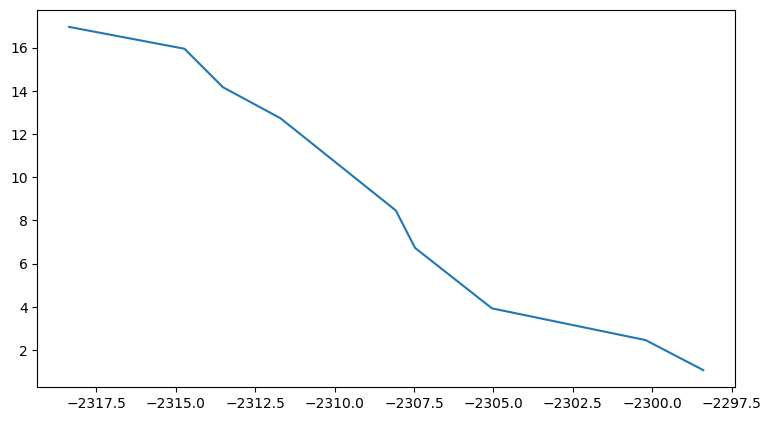

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10*9/16] # Fixes dimensions of plot
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 100
import numpy as np

b_field = np.array([-2298.3950, # T
                    -2300.2099,
                    -2305.0500,
                    -2307.4699,
                    -2308.0749,
                    -2311.7050,
                    -2313.5200,
                    -2314.7299,
                    -2318.3601])

mass = np.array([1.07, # g
                 2.46,
                 3.93,
                 6.73,
                 8.46,
                 12.73,
                 14.17,
                 15.95,
                 16.96])

plt.plot(b_field, mass)

In [4]:
class EMAFilter:
    def __init__(self, alpha):
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = (1 - self.alpha) * self.filtered_value + self.alpha * new_value
        return self.filtered_value


(480,)
(480,)


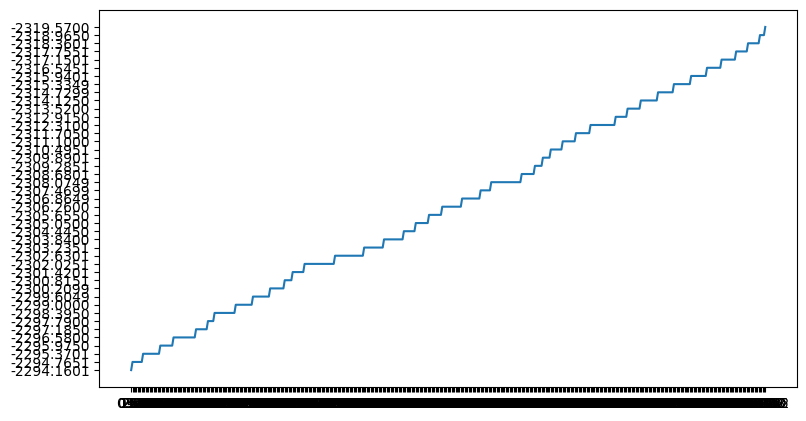

In [5]:
import csv

with open('test.csv') as csvfile:
    data = list(csv.reader(csvfile))

time = np.array([data[i][0] for i in range(1,len(data))])
b_field = np.array([data[i][3] for i in range(1,len(data))])

print(time.shape)
print(b_field.shape)

b_field_cleaned = [b_field.sort()]

plt.plot(time, b_field)

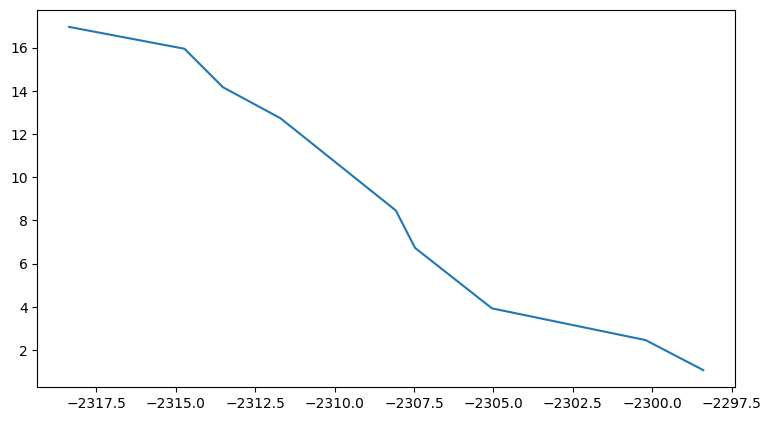

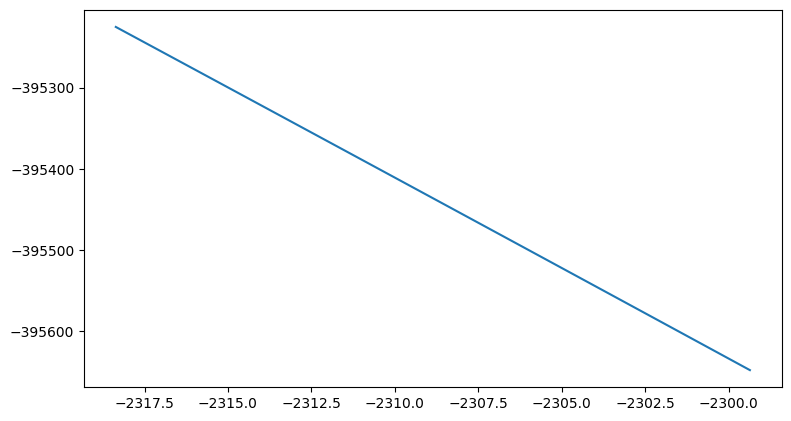

In [6]:
import scipy.optimize
import math

b_field = np.array([-2298.3950, # T
                    -2300.2099,
                    -2305.0500,
                    -2307.4699,
                    -2308.0749,
                    -2311.7050,
                    -2313.5200,
                    -2314.7299,
                    -2318.3601])

mass = np.array([1.07, # g
                 2.46,
                 3.93,
                 6.73,
                 8.46,
                 12.73,
                 14.17,
                 15.95,
                 16.96])

# print(b_field.dtype)
# print(np.log(np.abs(b_field)))
exp_fit_coefs = np.polyfit(np.log(np.abs(b_field)), mass, 2)

plt.figure()
plt.plot(b_field, mass)
plt.figure()
plt.plot(np.arange(min(b_field), max(b_field)), exp_fit_coefs[0]*np.log(np.abs(np.arange(min(b_field), max(b_field)))) + exp_fit_coefs[1])
# plt.show()


Regression Accuracy: 96.0%


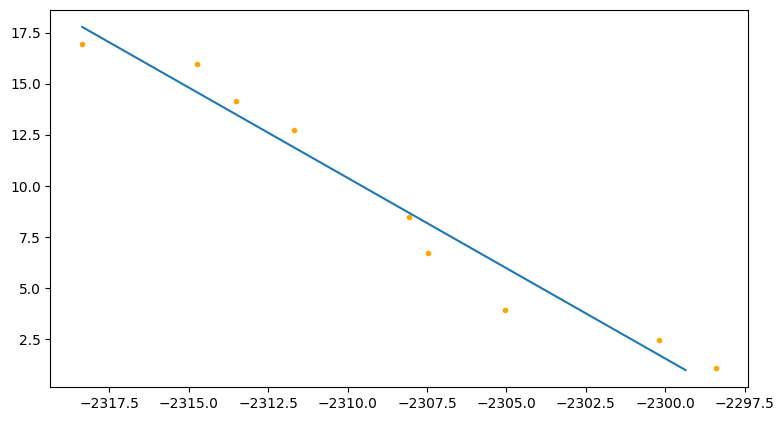

87.3%
29.3%
53.1%
21.1%
2.7%
6.6%
4.7%
8.7%
4.8%


In [7]:
import scipy
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(b_field, mass)
accuracy = r_value**2 * 100
print(f'Regression Accuracy: {accuracy:0.1f}%')
plt.scatter(b_field, mass, marker=".", color="orange")
x = np.arange(b_field.min(), b_field.max())
plt.plot(x, slope*x + intercept)
plt.show()
error = [abs((slope*b_field[i] + intercept) - mass[i])/mass[i]*100 for i in range(len(b_field))]
for i in range(len(error)):
    print(f'{error[i]:0.1f}%')


In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# x = []
# for i in range(1,len(data)):
#     row = [float(data[i][1]), float(data[i][2]), float(data[i][3])]
#     x.append(row)

x = np.array(b_field)
y = [mass[i] for i in range(len(mass))]

x = np.array(x).reshape((-1,1))
y = np.array(y)
print(x.shape)
print(y.shape)

model = SVR(kernel='rbf',C=1000.0, epsilon=0.3)
regr = make_pipeline(StandardScaler(), model)

fitter = regr.fit(x,y)

x_predict = np.linspace(np.min(b_field), np.max(b_field), 10000)
y_predict = np.zeros(x_predict.shape)
print(x_predict.shape)
print(y_predict.shape)

for i in range(len(x_predict)):
    y_predict[i] = fitter.predict(np.array([[x_predict[i]]]))

y_test = fitter.predict(x)

mag_diff = math.sqrt(sum([(y_test[i] - y[i])**2 for i in range(len(y))]))
mag_y = math.sqrt(sum([i**2 for i in y]))
error = mag_diff/mag_y * 100
accuracy = 100 - error

print(f'Accuracy: {accuracy:0.1f}%')

(9, 1)
(9,)
(10000,)
(10000,)
Accuracy: 97.4%


In [9]:
from sklearn_export import Export
export = Export(model)

MODEL_PATH = "/Users/jordanianjoker/Desktop/Starling-Medical/Programs/Magnet BPH Sensor/Models/"
MODEL_FILENAME = "svr_test1_rbf.json"
result = export.to_json(filename=MODEL_PATH+MODEL_FILENAME)

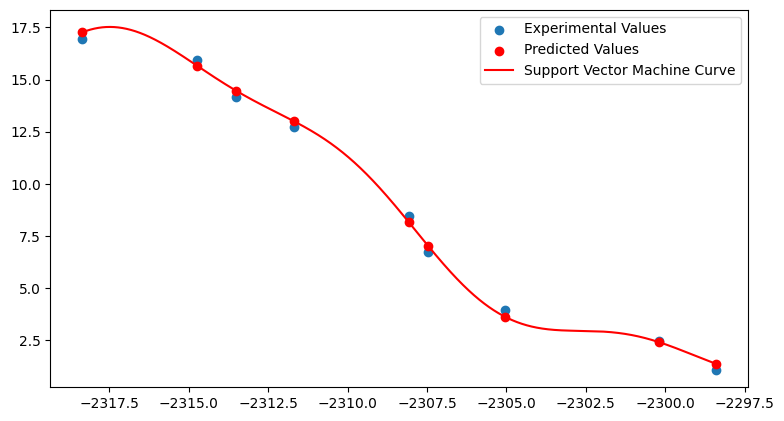

In [10]:
plt.scatter(b_field, mass)
plt.scatter(b_field, y_test, color="r")
plt.plot(x_predict, y_predict, color="r")
# plt.plot(b_field, y_test, color="r")
plt.legend(["Experimental Values", "Predicted Values", "Support Vector Machine Curve"])
plt.show()

# Test 2

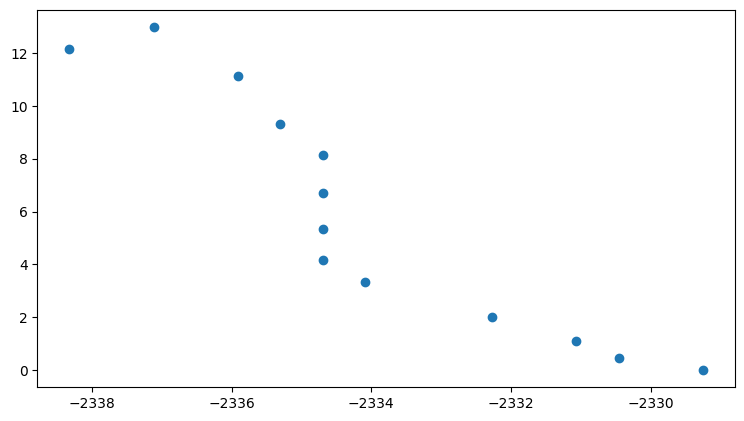

In [11]:
with open('test2.csv') as csvfile:
    data = list(csv.reader(csvfile))

time = np.array([float(data[i][0]) for i in range(1,len(data))])
b_field = np.array([float(data[i][3]) for i in range(1,len(data))])
mass = np.array([float(data[i][4]) for i in range(1,len(data))])

plt.scatter(b_field, mass)

In [12]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

x = []
for i in range(1,len(data)):
    row = [float(data[i][1]), float(data[i][2]), float(data[i][3])]
    x.append(row)

y = [mass[i] for i in range(len(mass))]

X = np.array(x)
y = np.array(y)
print(X.shape)
print(y.shape)

regr = make_pipeline(StandardScaler(), SVR(C=100.0, epsilon=0.3))
fitter = regr.fit(x,y)

x_predict = np.linspace(np.min(b_field), np.max(b_field), 10000)
y_predict = np.zeros(x_predict.shape)
print(x_predict.shape)
print(y_predict.shape)

for i in range(len(x_predict)):
    y_predict[i] = fitter.predict(np.array([[351.4680, 519.6920, x_predict[i]]]))

y_test = fitter.predict(x)

mag_diff = math.sqrt(sum([(y_test[i] - y[i])**2 for i in range(len(y))]))
mag_y = math.sqrt(sum([i**2 for i in y]))
error = mag_diff/mag_y * 100
accuracy = 100 - error

print(f'Accuracy: {accuracy:0.1f}%')

(13, 3)
(13,)
(10000,)
(10000,)
Accuracy: 87.4%


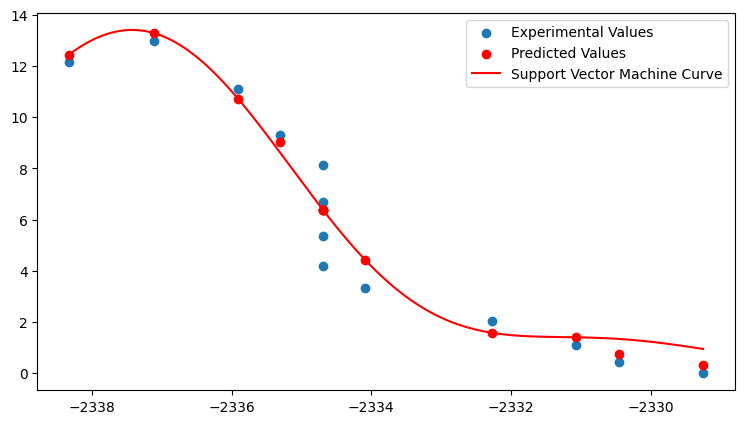

In [13]:
plt.scatter(b_field, mass)
plt.scatter(b_field, y_test, color="r")
plt.plot(x_predict, y_predict, color="r")
# plt.plot(b_field, y_test, color="r")
plt.legend(["Experimental Values", "Predicted Values", "Support Vector Machine Curve"])
plt.show()

In [14]:
fitter = regr.fit(b_field.reshape((-1, 1)),y)

# x_predict = np.linspace(np.min(b_field), np.max(b_field), 10000)
# y_predict = np.zeros(x_predict.shape)
# print(x_predict.shape)
# print(y_predict.shape)

# for i in range(len(x_predict)):
#     y_predict[i] = fitter.predict(np.array([[351.4680, 519.6920, x_predict[i]]]))

y_test = fitter.predict(b_field.reshape((-1, 1)))

mag_diff = math.sqrt(sum([(y_test[i] - y[i])**2 for i in range(len(y))]))
mag_y = math.sqrt(sum([i**2 for i in y]))
error = mag_diff/mag_y * 100
accuracy = 100 - error

print(f'Accuracy: {accuracy:0.1f}%')

Accuracy: 88.4%


# Test 4

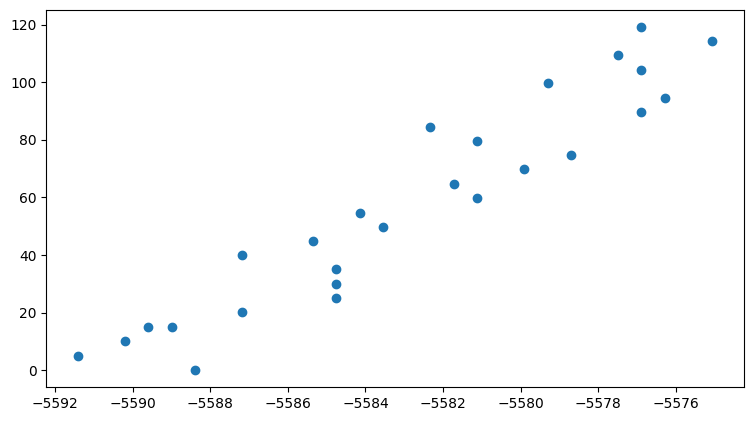

In [15]:
with open('test4.csv') as csvfile:
    data = list(csv.reader(csvfile))

time = np.array([float(data[i][0]) for i in range(1,len(data))])
b_field_x = np.array([float(data[i][2]) for i in range(1,len(data))])
b_field_y = np.array([float(data[i][3]) for i in range(1,len(data))])
b_field_z = np.array([float(data[i][4]) for i in range(1,len(data))])
mass = np.array([float(data[i][5]) for i in range(1,len(data))])

plt.scatter(b_field_z, mass)

# Test 5

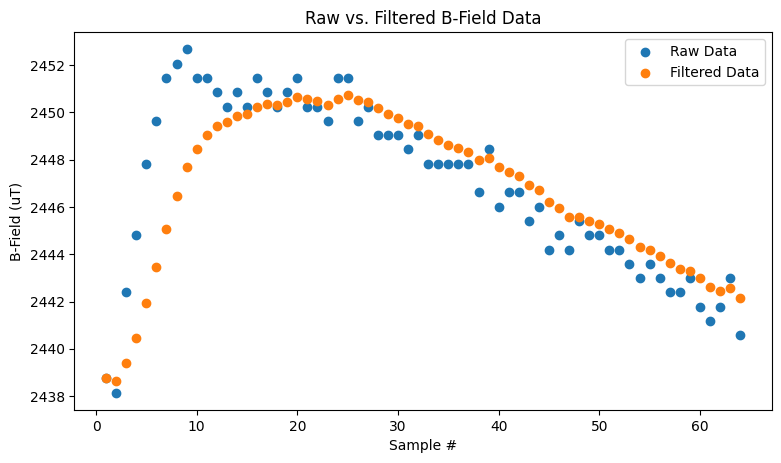

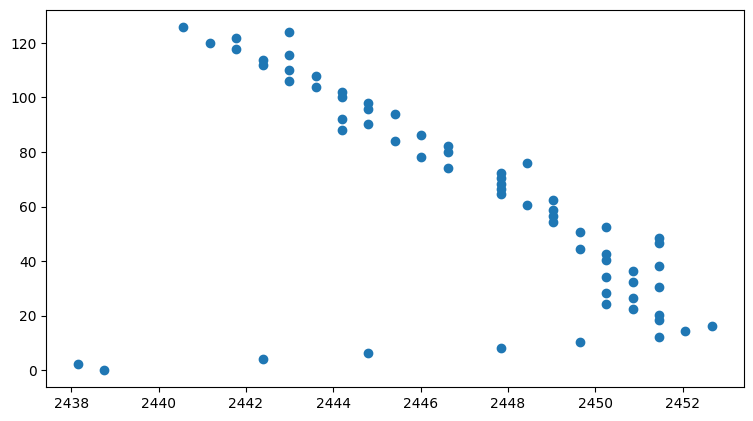

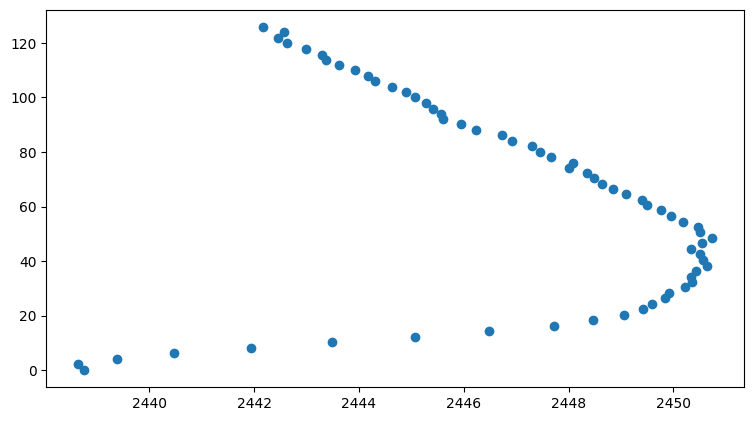

In [16]:
with open('test5.csv') as csvfile:
    data = list(csv.reader(csvfile))

time = np.array([float(data[i][0]) for i in range(1,len(data))])
b_field_x = np.array([float(data[i][2]) for i in range(1,len(data))])
b_field_y = np.array([float(data[i][3]) for i in range(1,len(data))])
b_field_z = np.array([float(data[i][4]) for i in range(1,len(data))])
mass = np.array([float(data[i][5]) for i in range(1,len(data))])

ema_filter = EMAFilter(alpha=0.2)

# Apply the EMA filter to smooth out the noisy data
smoothed_data = np.array([ema_filter.update(value) for value in [float(data[i][4]) for i in range(1,len(data))]])

plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 100

plt.scatter(time, b_field_z,  label="Raw Data")
plt.scatter(time, smoothed_data, label="Filtered Data")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.legend()
plt.title("Raw vs. Filtered B-Field Data")
plt.show()

import pandas as pd

df = pd.DataFrame(list(zip(time, b_field_z, smoothed_data)),
                  columns =['Sample #', 'Raw Data', 'Filtered Data'])

df.to_csv('Filtered_vs_Raw.csv')

plt.scatter(b_field_z, mass)
plt.show()
plt.scatter(smoothed_data, mass)
plt.show()



Regression Accuracy: 94.3%
r^2: 0.9426216063385275


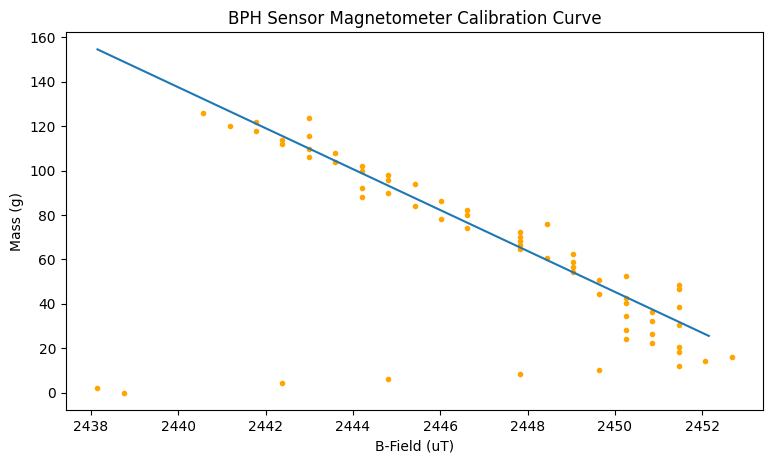

In [17]:
import scipy
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(b_field_z[10:], mass[10:])
accuracy = r_value**2 * 100
print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
plt.scatter(b_field_z, mass, marker=".", color="orange")
x = np.arange(b_field_z.min(), b_field_z.max())
plt.plot(x,slope*x + intercept)
plt.ylabel("Mass (g)")
plt.xlabel("B-Field (uT)")
plt.title("BPH Sensor Magnetometer Calibration Curve")
plt.show()
# error = [abs((slope*b_field_z[i] + intercept) - mass[i])/mass[i]*100 for i in range(len(b_field_z))]
# for i in range(len(error)):
#     print(f'{error[i]:0.1f}%')

Regression Accuracy: 99.7%
r^2: 0.9965446079834792


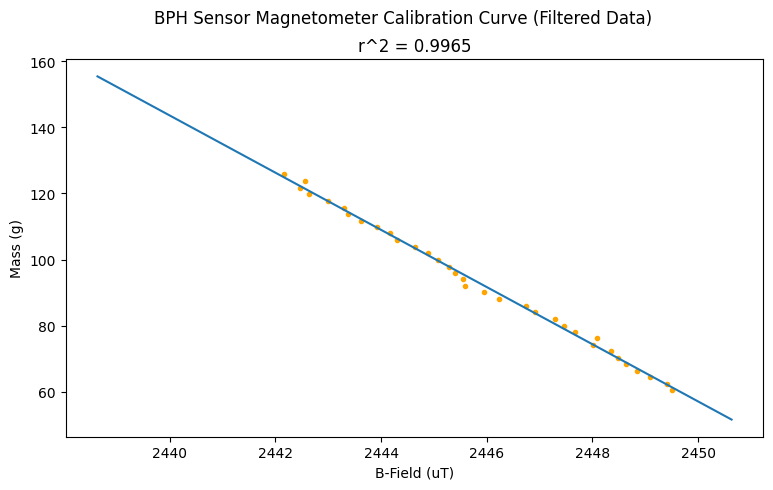

In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(smoothed_data[30:], mass[30:])
accuracy = r_value**2 * 100
print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
plt.scatter(smoothed_data[30:], mass[30:], marker=".", color="orange")
x = np.arange(smoothed_data.min(), smoothed_data.max())
plt.plot(x,slope*x + intercept)
plt.ylabel("Mass (g)")
plt.xlabel("B-Field (uT)")
plt.suptitle("BPH Sensor Magnetometer Calibration Curve (Filtered Data)")
plt.title(f"r^2 = {r_value**2:0.4f}")
plt.show()

filtered_data = smoothed_data[30:]
filtered_mass = mass[30:]
raw_data = b_field_z[10:]
raw_mass = mass[10:]

import pandas as pd 
df = pd.DataFrame(list(zip(filtered_data, filtered_mass, raw_data, raw_mass)),
               columns =['Filtered Data', 'Filtered Mass', 'Raw Data', 'Raw Mass'])

df.to_csv("test_data_magnetometer.csv")

In [19]:
# Prediction Power

vals = np.array([[2444.2001, 2441.1750, 2443.5949, 2443.7800, 2445.4101]])

def predict(input):
    return slope*input + intercept

average = np.mean(predict(vals))
std_dev = np.std(predict(vals))
accuracy = 100 - abs(average - 100)

print(f"Average: {average}\nStandard Deviation: {std_dev}\nAccuracy: {accuracy}%")


Average: 112.18811794980138
Standard Deviation: 11.955918526884945
Accuracy: 87.81188205019862%


# Test 6
## 5X Gain

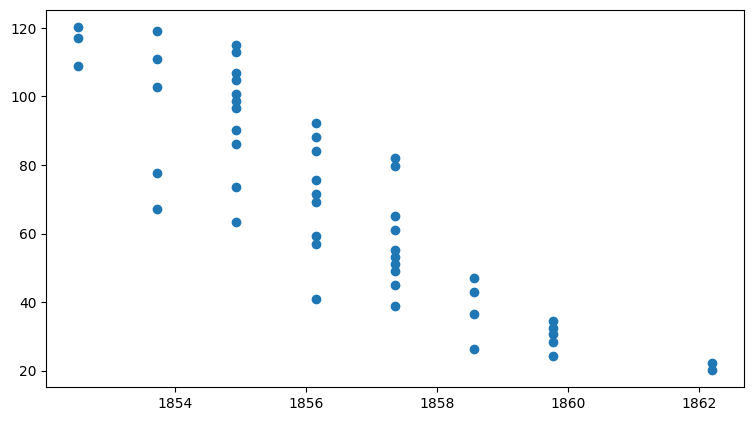

In [20]:
with open('test6.csv') as csvfile:
    data = list(csv.reader(csvfile))

time = np.array([float(data[i][0]) for i in range(1,len(data))])
b_field_x = np.array([float(data[i][2]) for i in range(1,len(data))])
b_field_y = np.array([float(data[i][3]) for i in range(1,len(data))])
b_field_z = np.array([float(data[i][4]) for i in range(1,len(data))])
mass = np.array([float(data[i][5]) for i in range(1,len(data))])

plt.scatter(b_field_z, mass)

# Test 7
## 2.5X Gain

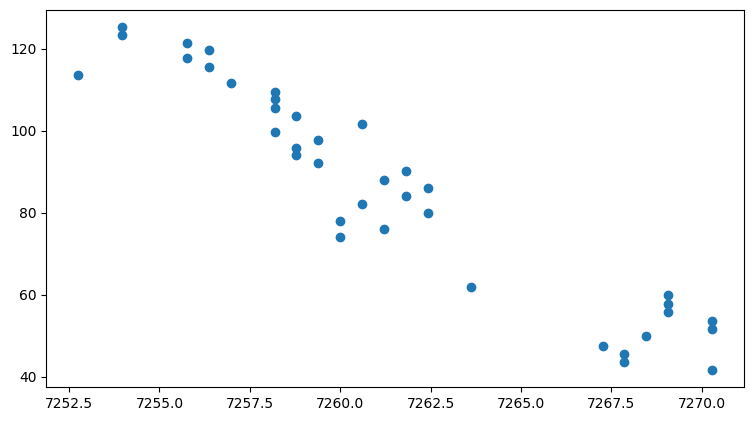

In [21]:
with open('test7.csv') as csvfile:
    data = list(csv.reader(csvfile))

time = np.array([float(data[i][0]) for i in range(1,len(data))])
b_field_x = np.array([float(data[i][2]) for i in range(1,len(data))])
b_field_y = np.array([float(data[i][3]) for i in range(1,len(data))])
b_field_z = np.array([float(data[i][4]) for i in range(1,len(data))])
mass = np.array([float(data[i][5]) for i in range(1,len(data))])

b_field_z = b_field_z[20:]
mass = mass[20:]

cleaned_data = np.array(b_field_z)

plt.scatter(b_field_z, mass)

Regression Accuracy: 90.0%
r^2: 0.8998826935504235


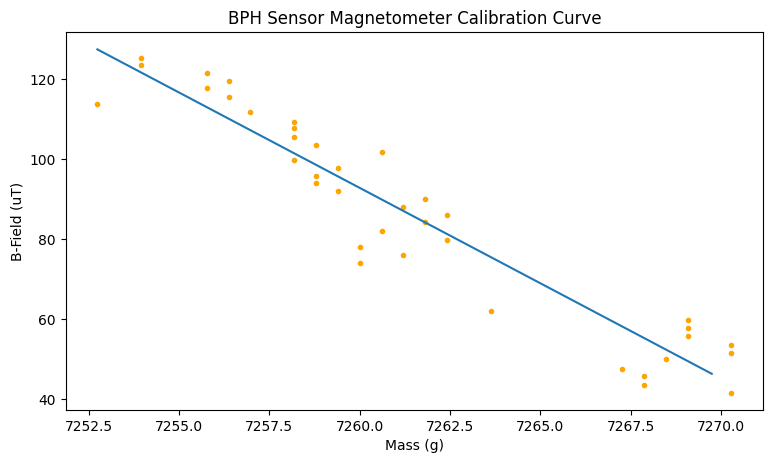

In [22]:
import scipy
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(b_field_z, mass)
accuracy = r_value**2 * 100
print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
plt.scatter(b_field_z, mass, marker=".", color="orange")
x = np.arange(b_field_z.min(), b_field_z.max())
plt.plot(x,slope*x + intercept)
plt.xlabel("Mass (g)")
plt.ylabel("B-Field (uT)")
plt.title("BPH Sensor Magnetometer Calibration Curve")
plt.show()
# error = [abs((slope*b_field_z[i] + intercept) - mass[i])/mass[i]*100 for i in range(len(b_field_z))]
# for i in range(len(error)):
#     print(f'{error[i]:0.1f}%')

In [23]:
def visualize_data(file):
    with open(file) as csvfile:
        data = list(csv.reader(csvfile))

    time = np.array([float(data[i][0]) for i in range(1,len(data))])
    b_field_x = np.array([float(data[i][2]) for i in range(1,len(data))])
    b_field_y = np.array([float(data[i][3]) for i in range(1,len(data))])
    b_field_z = np.array([float(data[i][4]) for i in range(1,len(data))])
    mass = np.array([float(data[i][5]) for i in range(1,len(data))])

    plt.scatter(b_field_z, mass)

def plot_linear_regr(file):
    import scipy
    from scipy import stats

    with open(file) as csvfile:
        data = list(csv.reader(csvfile))

    b_field_z = np.array([float(data[i][4]) for i in range(1,len(data))])
    mass = np.array([float(data[i][5]) for i in range(1,len(data))])

    slope, intercept, r_value, p_value, std_err = stats.linregress(b_field_z, mass)
    accuracy = r_value**2 * 100
    print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
    plt.scatter(b_field_z, mass, marker=".", color="orange")
    x = np.arange(b_field_z.min(), b_field_z.max())
    plt.plot(x,slope*x + intercept)
    plt.xlabel("Mass (g)")
    plt.ylabel("B-Field (uT)")
    plt.title("BPH Sensor Magnetometer Calibration Curve")
    plt.show()
    # error = [abs((slope*b_field_z[i] + intercept) - mass[i])/mass[i]*100 for i in range(len(b_field_z))]
    # for i in range(len(error)):
    #     print(f'{error[i]:0.1f}%')

# Test 8
## 1X Gain

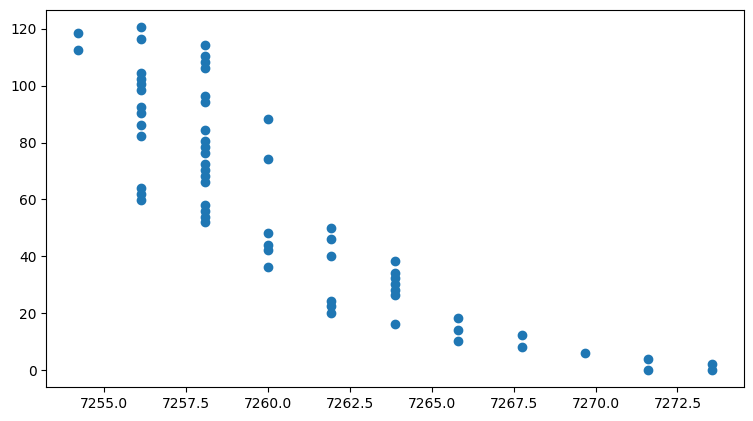

In [24]:
visualize_data('test8.csv')

Regression Accuracy: 73.9%
r^2: 0.7392856445385938


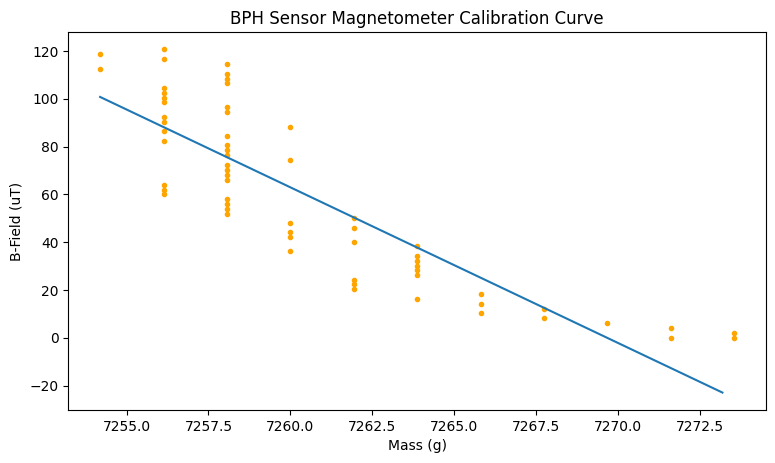

In [25]:
plot_linear_regr('test8.csv')

In [26]:
from scipy.optimize import curve_fit

with open('test8.csv') as csvfile:
        data = list(csv.reader(csvfile))

b_field_z = np.array([float(data[i][4]) for i in range(1,len(data))])
mass = np.array([float(data[i][5]) for i in range(1,len(data))])

def func(x, a, b):
    return np.vectorize(a*(((9810*x/((12*6894.76/(1000**2))*25*math.pi*(1+2*1.25**2)))+2)/math.sqrt(((9810*x/((12*6894.76/(1000**2))*25*math.pi*(1+2*1.25**2)))+2)**2 + 25) - ((9810*x/((12*6894.76/(1000**2))*25*math.pi*(1+2*1.25**2))))/math.sqrt((9810*x/((12*6894.76/(1000**2))*25*math.pi*(1+2*1.25**2)))**2 + 25) ) + b)



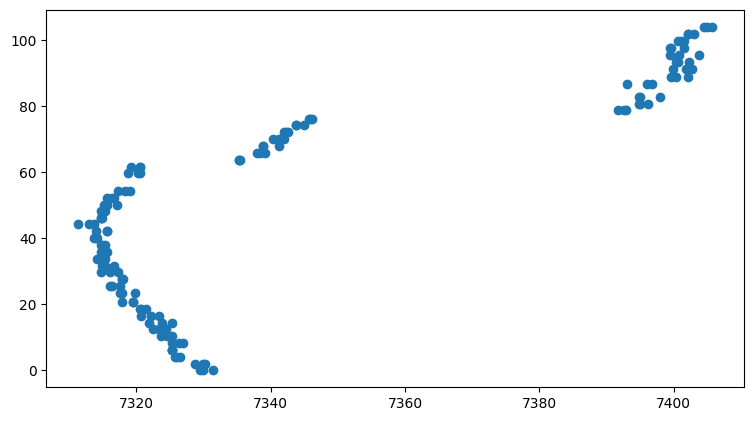

In [27]:
visualize_data('test8_2.csv')

# Magnetic Elastomer Design

alpha = 0.4347 T
z = 0.0009094204879223356 m
delta = 0.0905795120776644 mm
P = 12490.480 Pa
B = 7281.950657497465 uT


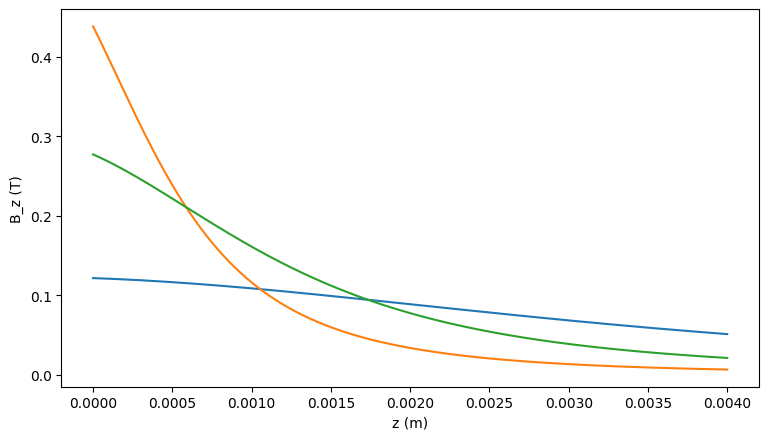

alpha = 0.04335914468843506 T
Br = 0.08671828937687012 T
B = 3459.063544106812 uT


In [28]:
mu = 1.05
M = 828e-3 # A/m or 955e-3
alpha = M*mu/2

silicones = {"EcoFlex 00-50": 12,
             "EcoFlex 00-30": 10,
             "EcoFlex 00-20": 8,
             "VytaFlex 30": 65,
             "VytaFlex 20": 50} # psi

# [Tesla] = kg/(A*s^2)

# 1 g of water
m = 1e-3 # kg
modulus = silicones["EcoFlex 00-50"] # psi
gamma = modulus * 6894.76 # Pa
g = 9.81 # m/s^2

# Cylinder with 10mm diameter magnet, 2mm thickness
d = 1e-3 # m
R = 1/2*d # m
tau = 1e-3 # m
A_bulge = 2*math.pi*R*tau # m^2
A_compress = math.pi*R**2 # m^2
A_fluid = (50e-3)**2 # m^2
f = A_compress/A_bulge
delta = (m*g/A_compress * tau/gamma * ((1-0.5**2)/1.25)) # mm
z = tau - delta
delta *= 1000
load = m*g/A_compress
print(f'alpha = {alpha} T')
print(f'z = {z} m')
print(f'delta = {delta} mm')
print(f'P = {load:0.3f} Pa')

z = 6e-3
R = (10e-3)/2
alpha = 0.16
B = alpha * ((z + tau) / np.sqrt((z + tau)**2 + R**2) - (z)/np.sqrt(z**2 + R**2)) * 10**6
print(f'B = {B} uT')

alpha = 0.62
z = np.linspace(0, 0.004, 1000000)
B = alpha * ((z + tau) / np.sqrt((z + tau)**2 + R**2) - (z)/np.sqrt(z**2 + R**2))
plt.plot(z, B)
R = (2e-3)/2
B = alpha * ((z + tau) / np.sqrt((z + tau)**2 + R**2) - (z)/np.sqrt(z**2 + R**2))
plt.plot(z, B)
R = (4e-3)/2
B = alpha * ((z + tau) / np.sqrt((z + tau)**2 + R**2) - (z)/np.sqrt(z**2 + R**2))
plt.plot(z, B)
plt.xlabel('z (m)')
plt.ylabel('B_z (T)')
plt.show()

z = 4.5e-3
R = (5e-3)/2
alpha = 0.16
B = 1570e-6
alpha = B/(((z + tau) / np.sqrt((z + tau)**2 + R**2) - (z)/np.sqrt(z**2 + R**2)))
print(f'alpha = {alpha} T')
Br = alpha * 2
print(f'Br = {Br} T')
z = 3e-3
B = alpha * ((z + tau) / np.sqrt((z + tau)**2 + R**2) - (z)/np.sqrt(z**2 + R**2)) * 10**6
print(f'B = {B} uT')

# Exponential Moving Average Filter

Noisy Data: [10, 12, 15, 8, 20, 18, 22, 14, 16, 25]
Smoothed Data: [10, 10.2, 10.68, 10.412, 11.370800000000001, 12.033720000000002, 13.030348000000004, 13.127313200000003, 13.414581880000004, 14.573123692000003]


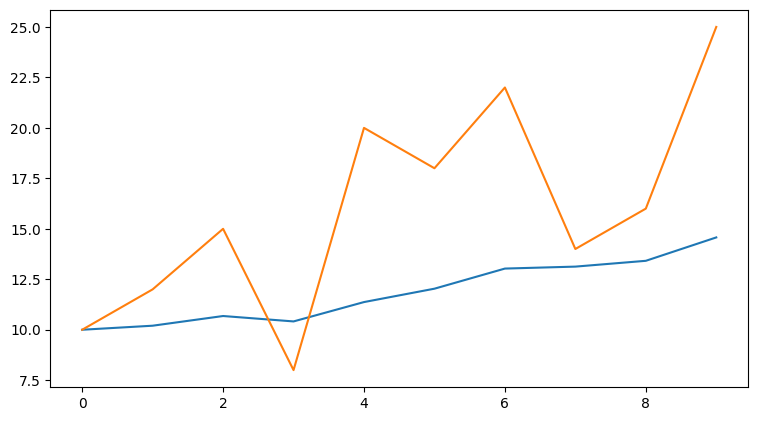

In [29]:
class EMAFilter:
    def __init__(self, alpha):
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = (1 - self.alpha) * self.filtered_value + self.alpha * new_value
        return self.filtered_value

# Create an EMA filter instance with a smoothing factor (alpha)
ema_filter = EMAFilter(alpha=0.1)

# Simulate noisy data
noisy_data = [10, 12, 15, 8, 20, 18, 22, 14, 16, 25]

# Apply the EMA filter to smooth out the noisy data
smoothed_data = [ema_filter.update(value) for value in noisy_data]

print("Noisy Data:", noisy_data)
print("Smoothed Data:", smoothed_data)

indices = [i for i in range(len(smoothed_data))]

plt.plot(indices, smoothed_data)
plt.plot(indices, noisy_data)
plt.show()

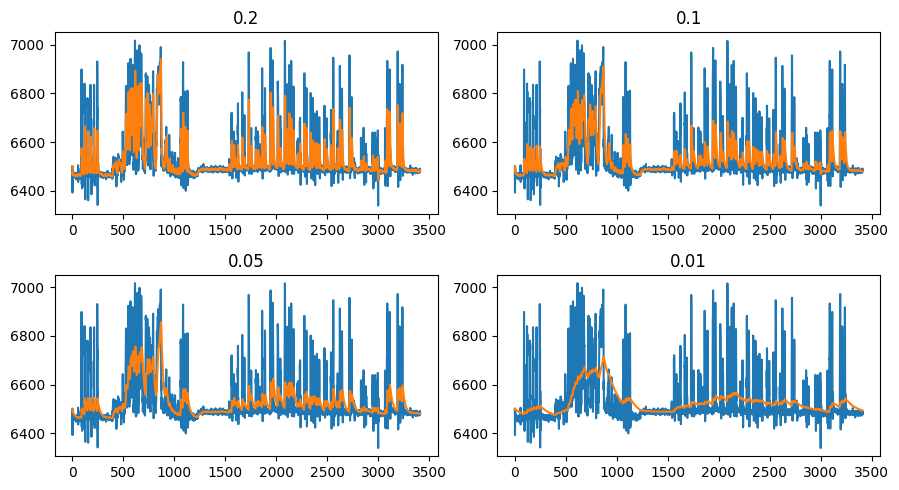

In [30]:
with open('magfilter.csv') as file:
    data = list(csv.reader(file))

data = data[1500:]

indices = [i for i in range(len(data))]
data = [float(i[0]) for i in data]

ema_filter_0_2 = EMAFilter(alpha=0.2)
ema_filter_0_1 = EMAFilter(alpha=0.1)
ema_filter_0_05 = EMAFilter(alpha=0.05)
ema_filter_0_01 = EMAFilter(alpha=0.01)

# plt.plot(indices, data)

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(indices, data)
plt.plot(indices, [ema_filter_0_2.update(value) for value in data])
plt.title('0.2')

plt.subplot(2, 2, 2)
plt.plot(indices, data)
plt.plot(indices, [ema_filter_0_1.update(value) for value in data])
plt.title('0.1')

plt.subplot(2, 2, 3)
plt.plot(indices, data)
plt.plot(indices, [ema_filter_0_05.update(value) for value in data])
plt.title('0.05')

plt.subplot(2, 2, 4)
plt.plot(indices, data)
plt.plot(indices, [ema_filter_0_01.update(value) for value in data])
plt.title('0.01')

plt.tight_layout()
plt.show()

# Bisection Method

In [31]:
def bisect(func, lower, upper, epsilon):
    err = 100
    xr = (lower + upper)/2
    while(err > epsilon):
        xr = (lower + upper)/2
        step = func(lower)*func(xr)
        if(step < 0):
            xr_old = xr
            lower = lower
            upper = xr_old
            xr = (lower + upper)/2
            err = abs((xr - xr_old)/xr_old)*100
        elif(step > 0):
            xr_old = xr
            lower = xr_old
            upper = upper
            xr = (lower + upper)/2
            err = abs((xr - xr_old)/xr_old)*100
        else:
            return 100,xr
        
    acc = 100 - err
    return acc,xr

In [32]:
# Bisection Method Test
def func(x):
    return x**3 - x - 1

[acc, xr] = bisect(func,0,2,0.000000000000001)

print(f'Root: {xr}\nAccuracy: {acc}%')

Root: 1.3247179572447458
Accuracy: 100.0%


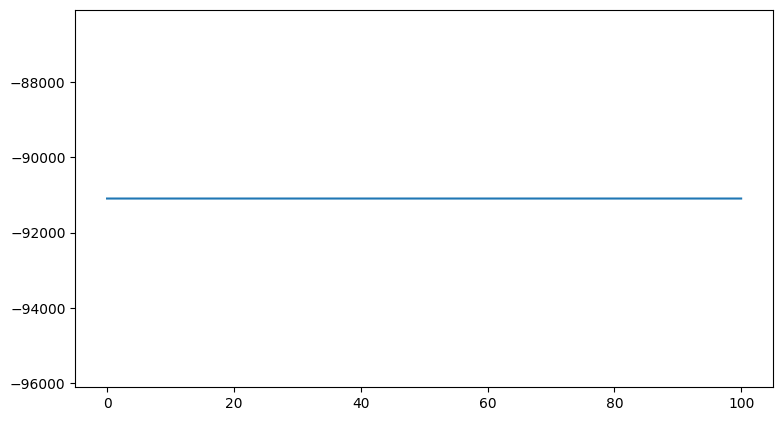

In [33]:
import math
import numpy as np
import matplotlib.pyplot as plt

def func(m):
    m = 1e-3
    alpha = 1
    modulus = 12 # psi
    gamma = modulus * 6894.76 # Pa
    g = 9.81 # m/s^2
    d = 1e-3 # m
    R = 1/2*d # m
    tau = 1e-3 # m
    A_compress = math.pi*R**2 # m^2
    delta = (m*g/A_compress * tau/gamma * ((1-0.5**2)/1.25)) # mm
    z = tau - delta
    delta *= 1000
    B = 7000 * 10**-6
    return B - alpha * ((z + tau) / np.sqrt((z + tau)**2 + R**2) - (z)/np.sqrt(z**2 + R**2)) * 10**6

m = np.linspace(0,100,10000)
f = [func(i) for i in m]
plt.plot(m,f)

# Auto Logger Test 1

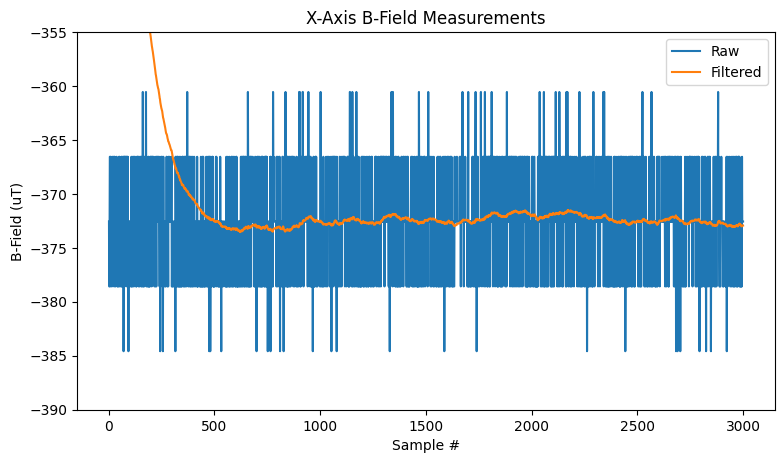

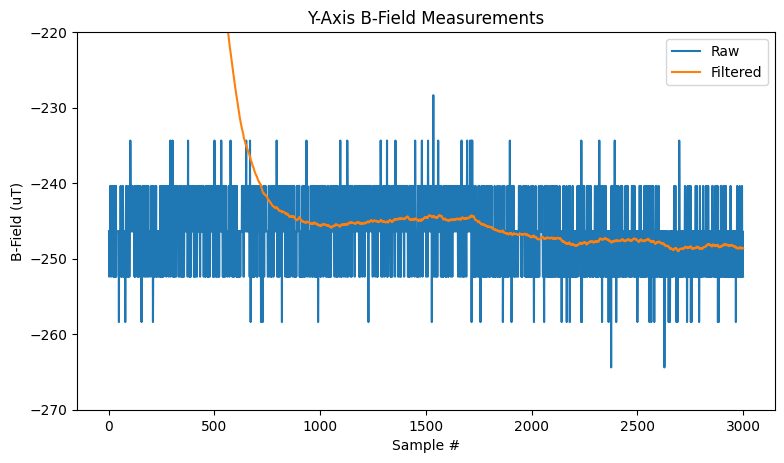

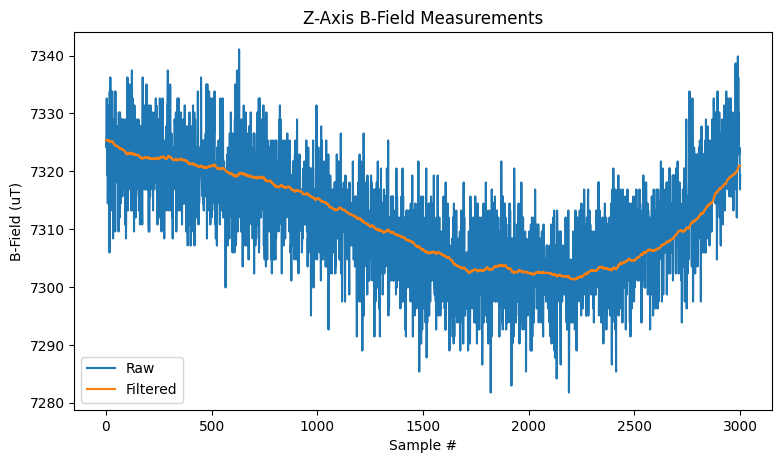

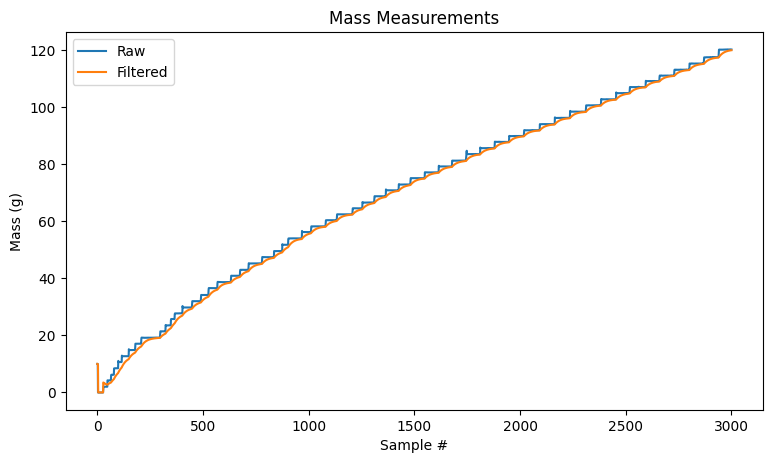

In [34]:
with open('auto_test1.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = [ema_filter_mag.update(value) for value in b_field_z]
filtered_b_field_y = [ema_filter_mag.update(value) for value in b_field_y]
filtered_b_field_x = [ema_filter_mag.update(value) for value in b_field_x]
filtered_mass = [ema_filter_mass.update(value)*(value >= 0) for value in mass]

plt.plot(sample, b_field_x, label="Raw")
plt.plot(sample, filtered_b_field_x, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.legend()
plt.title("X-Axis B-Field Measurements")
plt.ylim((-390, -355))
plt.show()
plt.plot(sample, b_field_y, label="Raw")
plt.plot(sample, filtered_b_field_y, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.legend()
plt.title("Y-Axis B-Field Measurements")
plt.ylim((-270, -220))
plt.show()
plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.legend()
plt.title("Z-Axis B-Field Measurements")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.legend()
plt.title("Mass Measurements")
plt.show()

Polynomial: B(m) = 1.4581331283084061e-06*m^4 + -0.000226297993967644*m^3 + 0.007572688735984514*m^2 + -0.15038441225476004*m + 7323.280737348341
0.9800810878053873


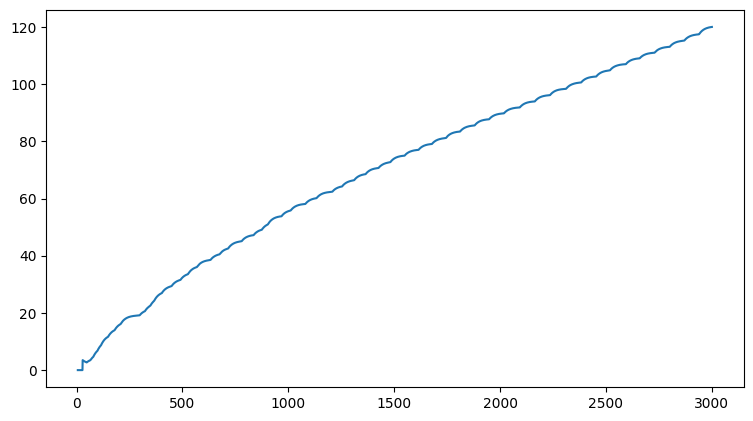

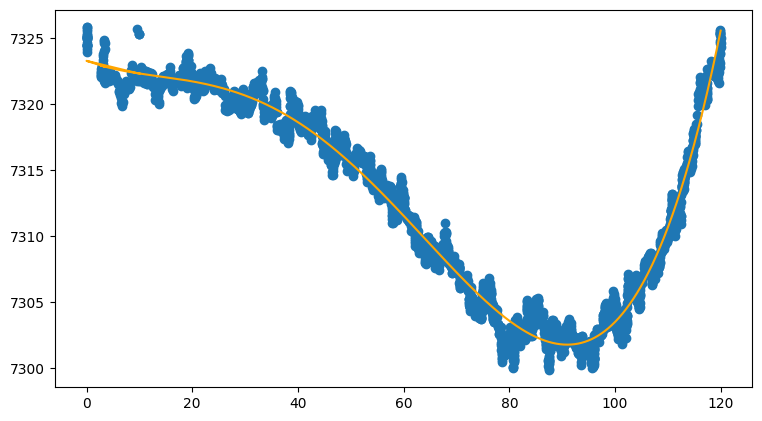

In [35]:
from scipy import stats
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('auto_test1.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

class EMAFilter:
    def __init__(self, alpha):
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = (1 - self.alpha) * self.filtered_value + self.alpha * new_value
        return self.filtered_value

ema_filter_mag = EMAFilter(alpha=0.05)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

p = np.polyfit(filtered_mass, filtered_b_field_z, 4)
polyfit_data = np.polyval(p, filtered_mass)
print(f"Polynomial: B(m) = {p[0]}*m^4 + {p[1]}*m^3 + {p[2]}*m^2 + {p[3]}*m + {p[4]}")

from sklearn.metrics import r2_score
coefficient_of_determination = r2_score(filtered_b_field_z, polyfit_data)
print(coefficient_of_determination)


plt.plot(sample[5:], filtered_mass[5:])
plt.show()
# plt.scatter(filtered_mass, filtered_b_field_z)
plt.scatter(filtered_mass, filtered_b_field_z)
plt.plot(filtered_mass, polyfit_data, color="orange")
plt.show()

# Auto Logger Test 2

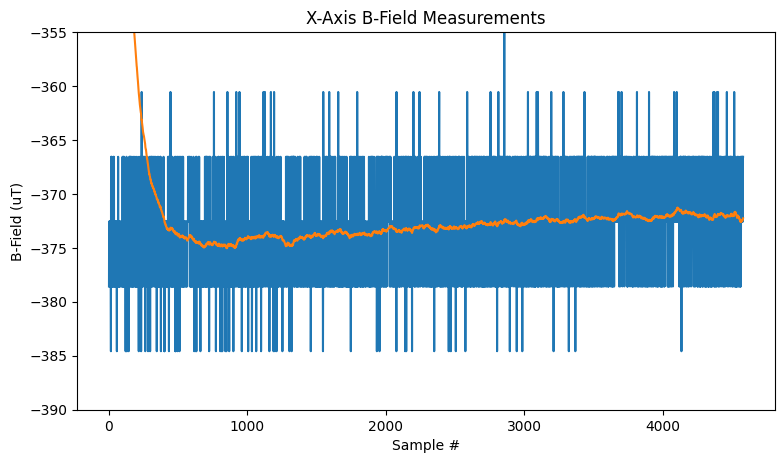

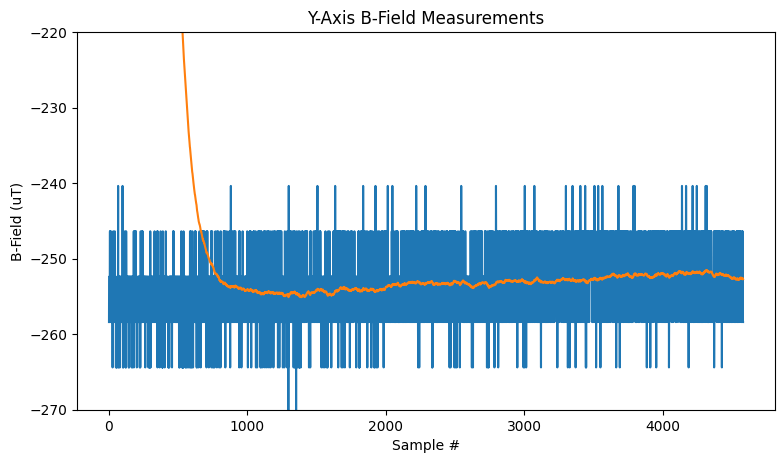

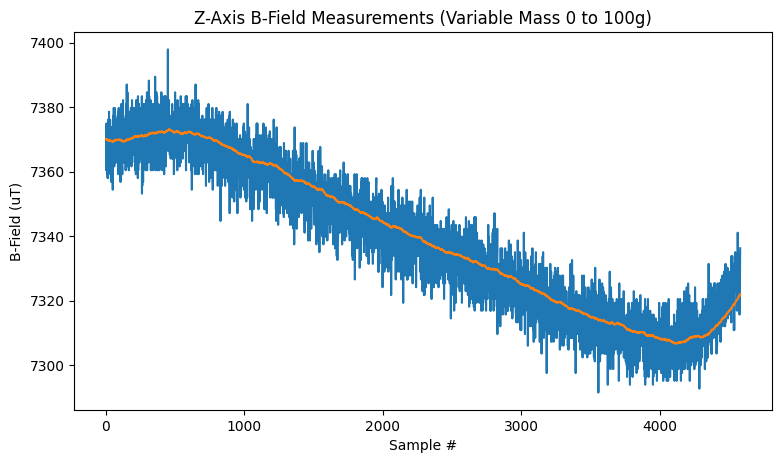

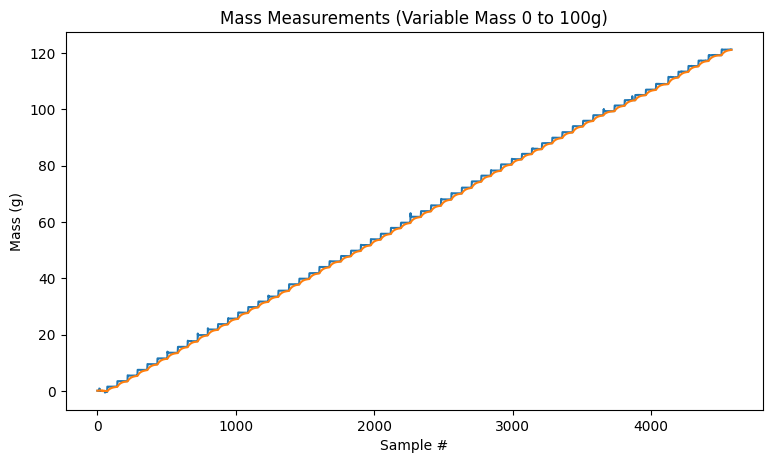

In [36]:
with open('auto_test2.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = [ema_filter_mag.update(value) for value in b_field_z]
filtered_b_field_y = [ema_filter_mag.update(value) for value in b_field_y]
filtered_b_field_x = [ema_filter_mag.update(value) for value in b_field_x]
filtered_mass = [ema_filter_mass.update(value)*(value >= 0) for value in mass]

plt.plot(sample, b_field_x, label="Raw")
plt.plot(sample, filtered_b_field_x, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("X-Axis B-Field Measurements")
plt.ylim((-390, -355))
plt.show()
plt.plot(sample, b_field_y, label="Raw")
plt.plot(sample, filtered_b_field_y, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Y-Axis B-Field Measurements")
plt.ylim((-270, -220))
plt.show()
plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Variable Mass 0 to 100g)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Variable Mass 0 to 100g)")
plt.show()

95.20456716801345
0.9970166337962344


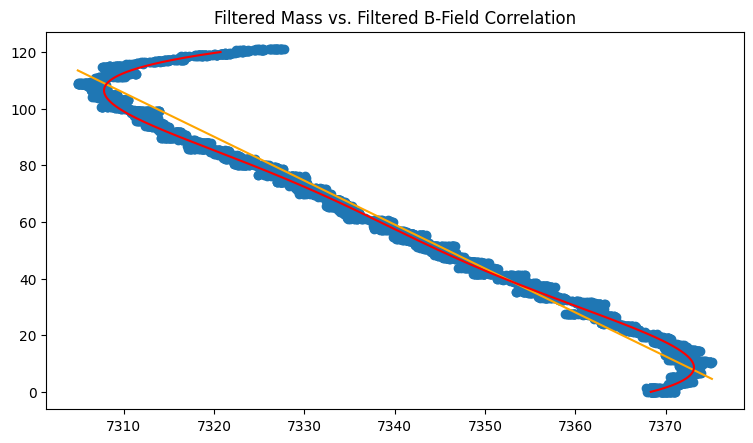

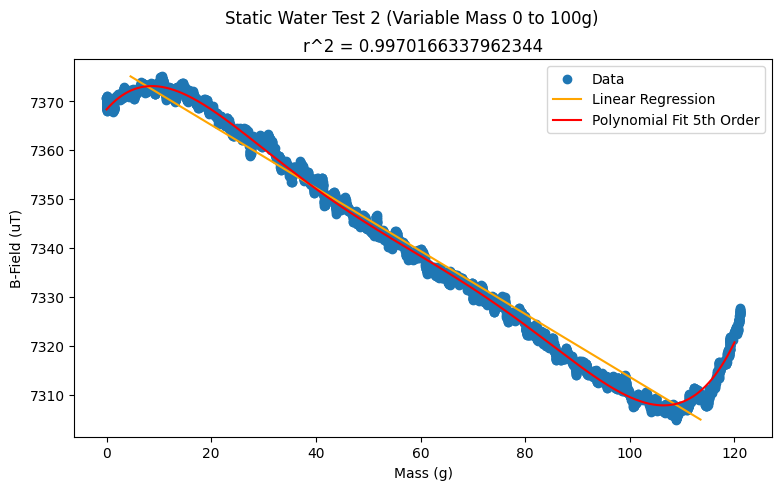

In [37]:
from scipy import stats
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('auto_test2.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

class EMAFilter:
    def __init__(self, alpha):
        self.alpha = alpha
        self.filtered_value = None

    def update(self, new_value):
        if self.filtered_value is None:
            self.filtered_value = new_value
        else:
            self.filtered_value = (1 - self.alpha) * self.filtered_value + self.alpha * new_value
        return self.filtered_value

ema_filter_mag = EMAFilter(alpha=0.05)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_b_field_z, filtered_mass)
print(r_value**2*100)

# Linear Regression
x = np.linspace(filtered_b_field_z.min(), filtered_b_field_z.max(), len(filtered_mass))
lin_mass = x*slope + intercept

# Polynomial Fit
p = np.polyfit(filtered_mass, filtered_b_field_z, 5)
poly_mag = np.polyval(p, np.linspace(0,120,1000))

from sklearn.metrics import r2_score
coefficient_of_determination = r2_score(filtered_b_field_z, np.polyval(p, filtered_mass))
print(coefficient_of_determination)

# plt.scatter(filtered_mass, filtered_b_field_z)
plt.scatter(filtered_b_field_z, filtered_mass)
plt.plot(x, lin_mass, color="orange")
plt.plot(poly_mag, np.linspace(0,120,1000), color="red")
plt.title("Filtered Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(filtered_mass, filtered_b_field_z, label="Data")
plt.plot(lin_mass, x, color="orange", label="Linear Regression")
plt.plot(np.linspace(0,120,1000), poly_mag, color="red", label="Polynomial Fit 5th Order")
plt.suptitle("Static Water Test 2 (Variable Mass 0 to 100g)")
plt.title(f"r^2 = {coefficient_of_determination}")
plt.xlabel("Mass (g)")
plt.ylabel("B-Field (uT)")
plt.legend()
plt.show()

# Auto Logger Steady Test (No Mass)

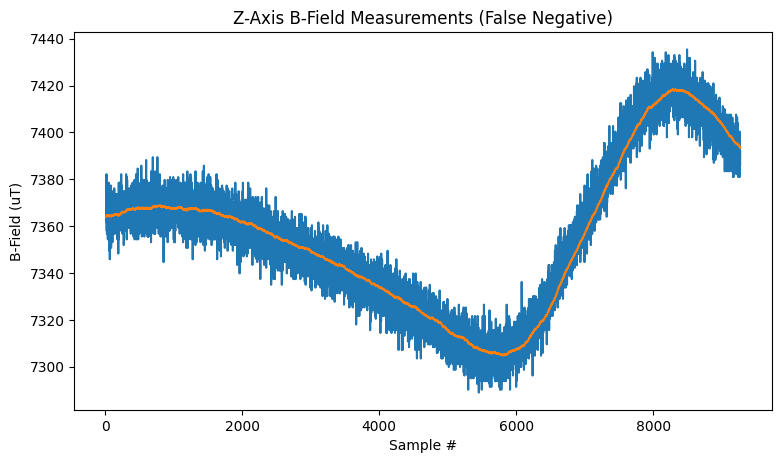

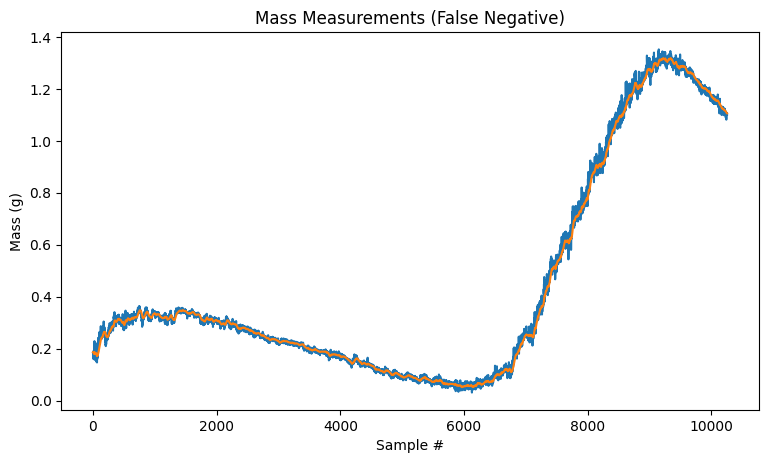

In [38]:
with open('auto_test_steady.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = [ema_filter_mag.update(value) for value in b_field_z]
filtered_b_field_y = [ema_filter_mag.update(value) for value in b_field_y]
filtered_b_field_x = [ema_filter_mag.update(value) for value in b_field_x]
filtered_mass = [ema_filter_mass.update(value)*(value >= 0) for value in mass]


plt.plot(time, b_field_z, label="Raw")
plt.plot(time, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (False Negative)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (False Negative)")
plt.show()

# Auto Logger Reverse Test 1

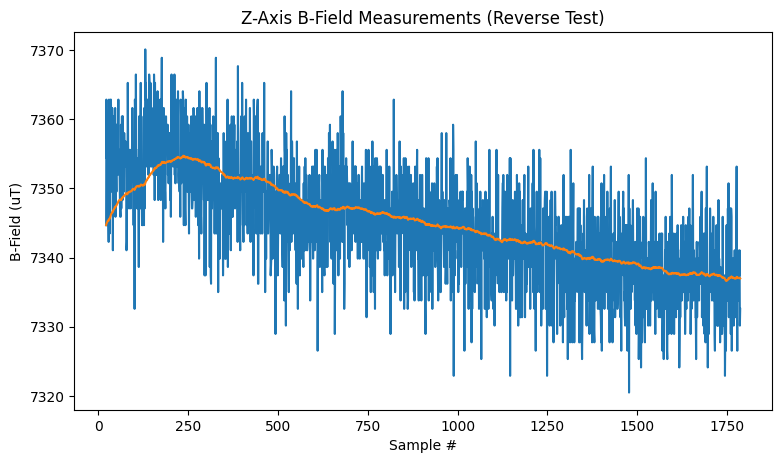

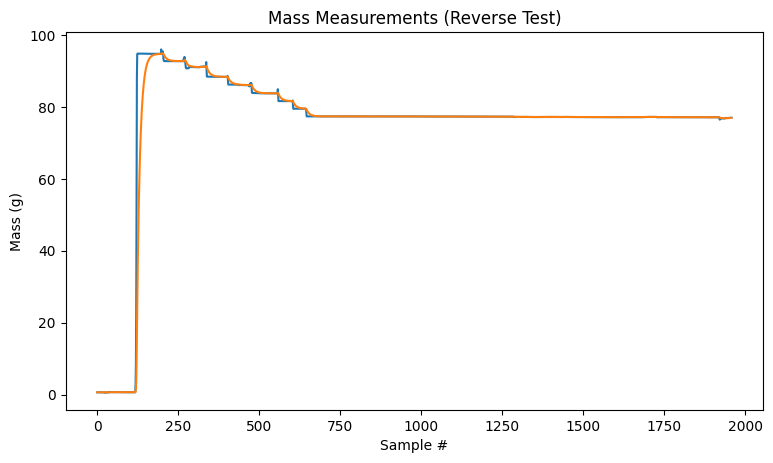

In [39]:
with open('auto_test_reverse_1.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.1)
filtered_b_field_z = [ema_filter_mag.update(value) for value in b_field_z]
filtered_b_field_y = [ema_filter_mag.update(value) for value in b_field_y]
filtered_b_field_x = [ema_filter_mag.update(value) for value in b_field_x]
filtered_mass = [ema_filter_mass.update(value)*(value >= 0) for value in mass]


plt.plot(time, b_field_z, label="Raw")
plt.plot(time, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Reverse Test)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Reverse Test)")
plt.show()

# Auto Logger Test 3

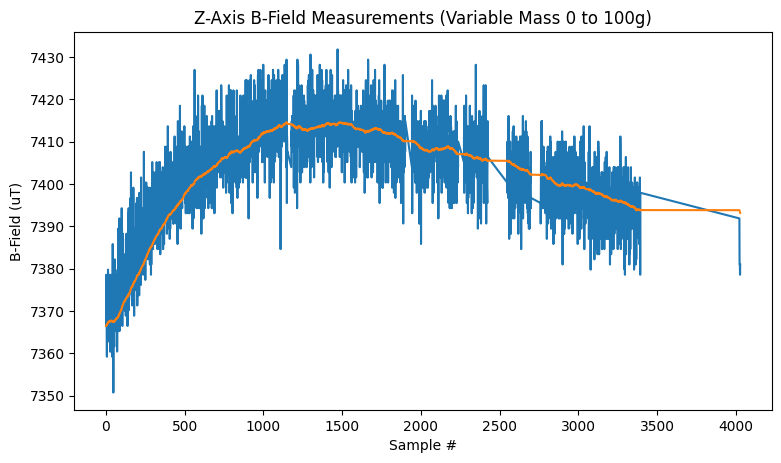

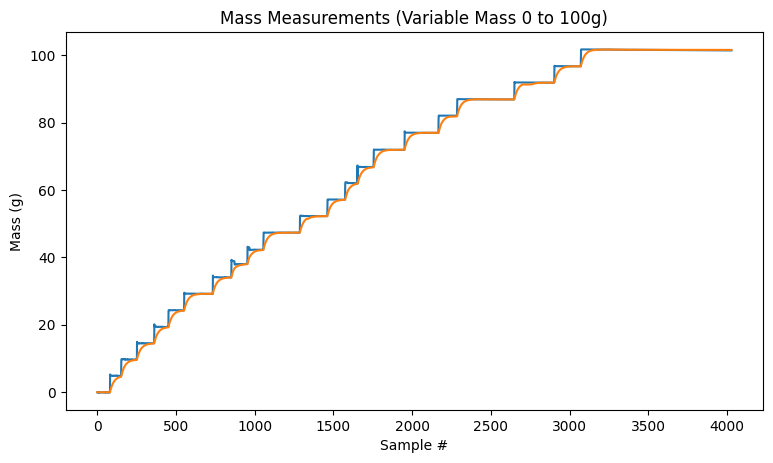

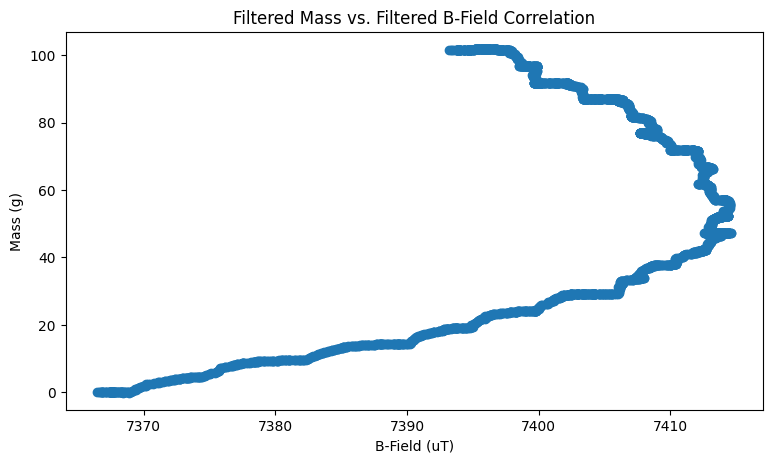

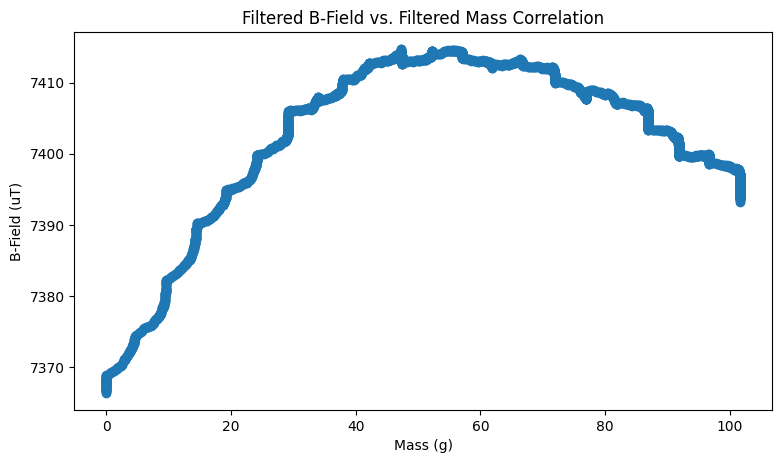

In [40]:
with open('auto_test3.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Variable Mass 0 to 100g)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Variable Mass 0 to 100g)")
plt.show()

plt.scatter(filtered_b_field_z, filtered_mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Filtered Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(filtered_mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Filtered Mass Correlation")
plt.show()

0.14496046576619132
0.9916389098098735


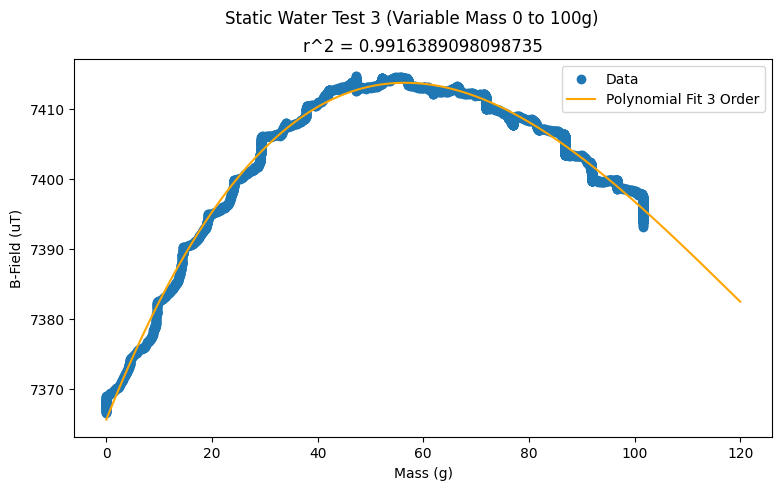

In [41]:
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_b_field_z, filtered_mass)
print(r_value**2)

# Linear Regression
x = np.linspace(filtered_b_field_z.min(), filtered_b_field_z.max(), len(filtered_mass))
lin_mass = x*slope + intercept

# Polynomial Fit
order = 3
p = np.polyfit(filtered_mass, filtered_b_field_z, order)
poly_mag = np.polyval(p, np.linspace(0,120,1000))

from sklearn.metrics import r2_score
coefficient_of_determination = r2_score(filtered_b_field_z, np.polyval(p, filtered_mass))
print(coefficient_of_determination)

plt.scatter(filtered_mass, filtered_b_field_z, label="Data")
plt.plot(np.linspace(0,120,1000), poly_mag, color="orange", label=f"Polynomial Fit {order} Order")
plt.suptitle("Static Water Test 3 (Variable Mass 0 to 100g)")
plt.title(f"r^2 = {coefficient_of_determination}")
plt.xlabel("Mass (g)")
plt.ylabel("B-Field (uT)")
plt.legend()
plt.show()

# Auto Logger Test 4

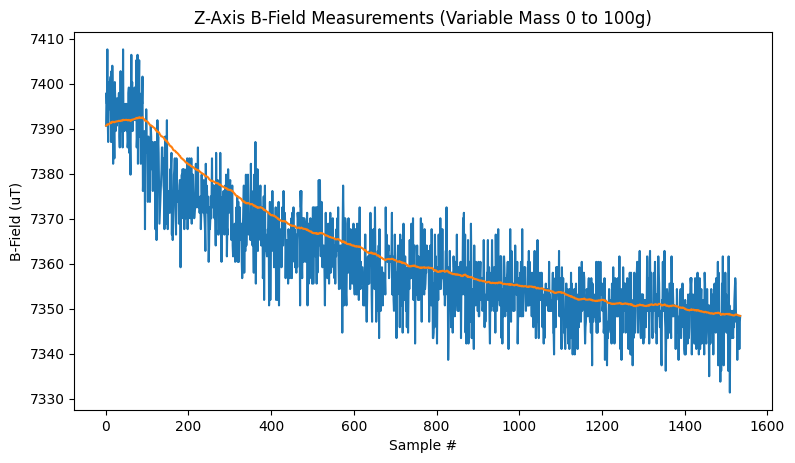

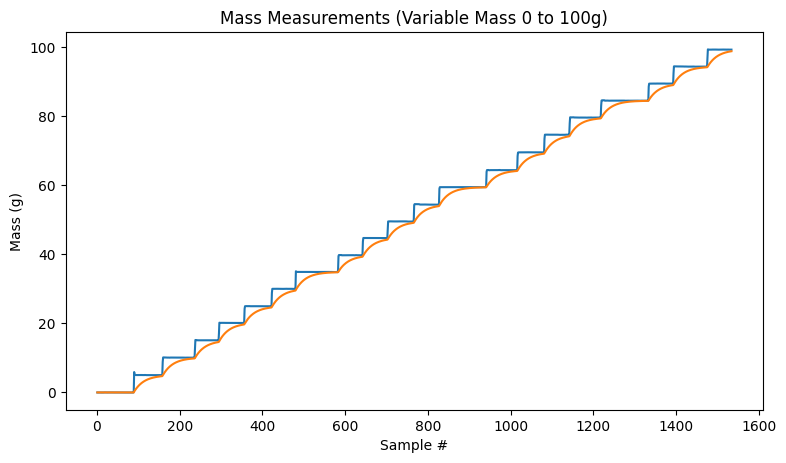

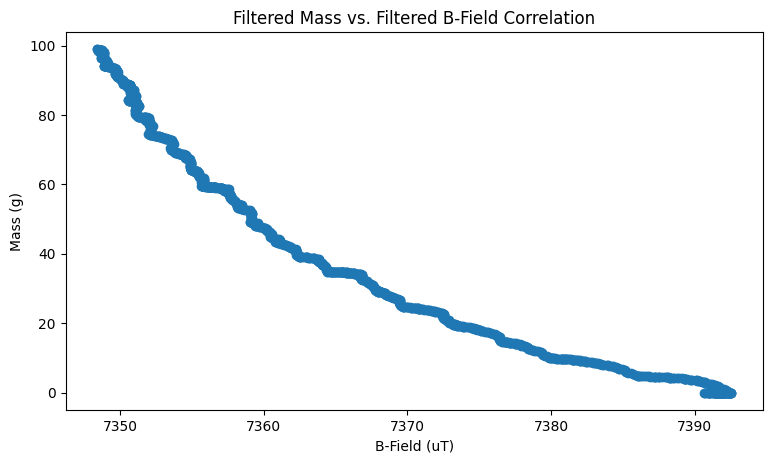

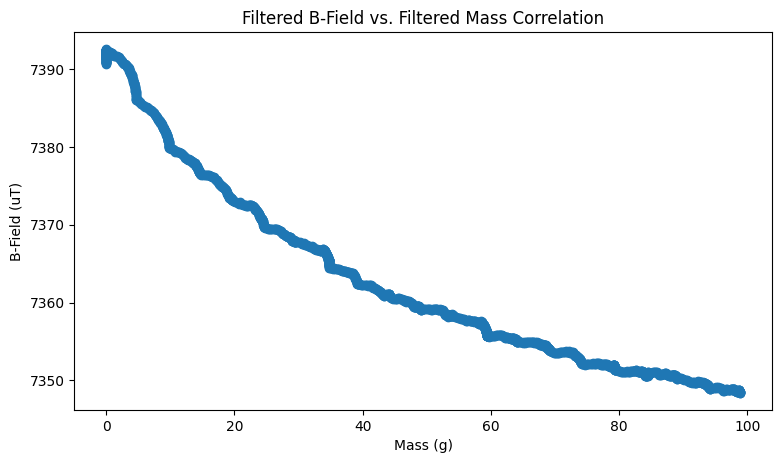

In [42]:
with open('auto_test4.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Variable Mass 0 to 100g)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Variable Mass 0 to 100g)")
plt.show()

plt.scatter(filtered_b_field_z, filtered_mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Filtered Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(filtered_mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Filtered Mass Correlation")
plt.show()

0.9147027076586751
0.9980264507667134


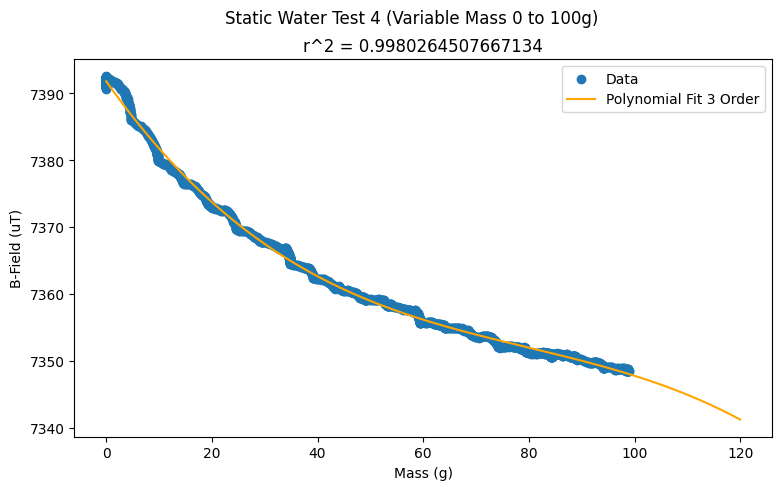

In [43]:
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_b_field_z, filtered_mass)
print(r_value**2)

# Linear Regression
x = np.linspace(filtered_b_field_z.min(), filtered_b_field_z.max(), len(filtered_mass))
lin_mass = x*slope + intercept

# Polynomial Fit
order = 3
p = np.polyfit(filtered_mass, filtered_b_field_z, order)
poly_mag = np.polyval(p, np.linspace(0,120,1000))

from sklearn.metrics import r2_score
coefficient_of_determination = r2_score(filtered_b_field_z, np.polyval(p, filtered_mass))
print(coefficient_of_determination)

plt.scatter(filtered_mass, filtered_b_field_z, label="Data")
plt.plot(np.linspace(0,120,1000), poly_mag, color="orange", label=f"Polynomial Fit {order} Order")
plt.suptitle("Static Water Test 4 (Variable Mass 0 to 100g)")
plt.title(f"r^2 = {coefficient_of_determination}")
plt.xlabel("Mass (g)")
plt.ylabel("B-Field (uT)")
plt.legend()
plt.show()

# Auto Logger Test 5

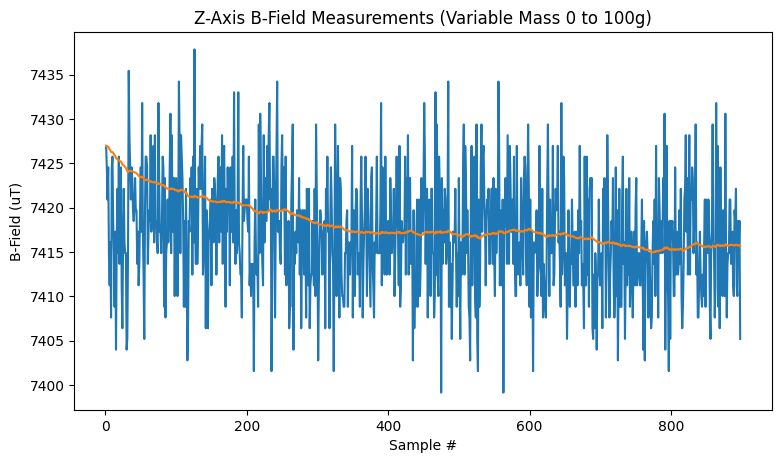

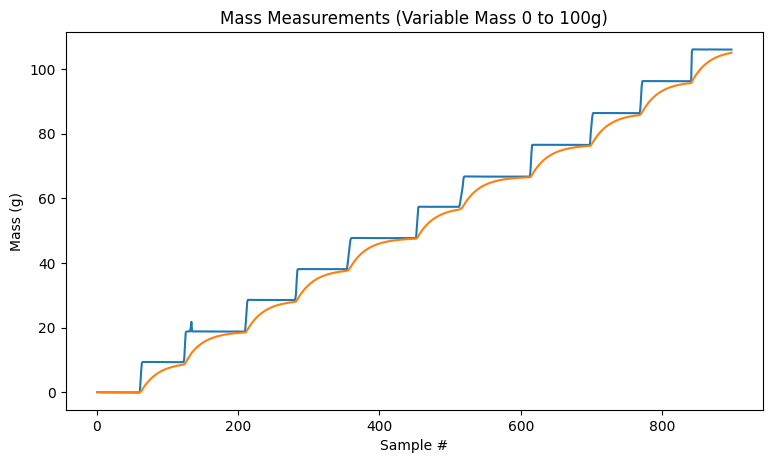

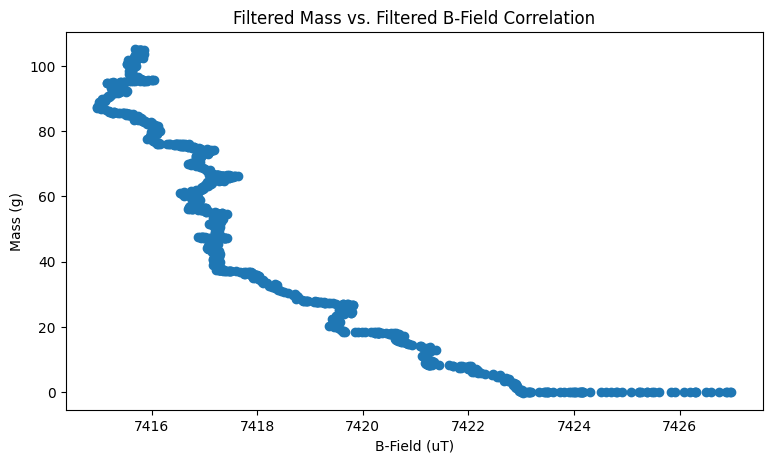

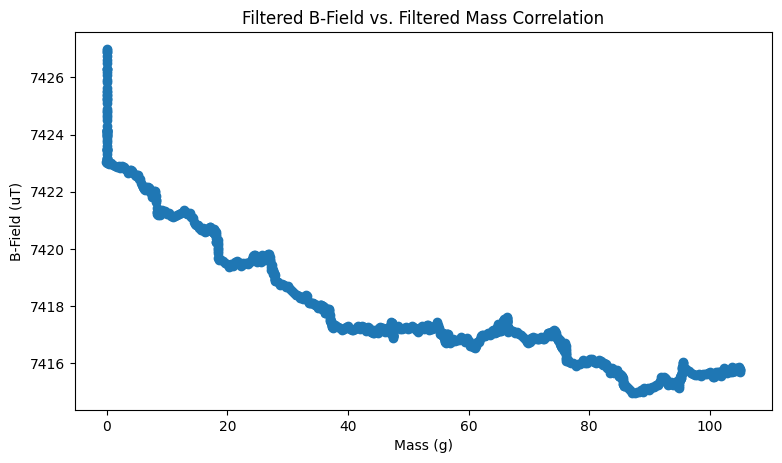

In [44]:
with open('auto_test5.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Variable Mass 0 to 100g)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Variable Mass 0 to 100g)")
plt.show()

plt.scatter(filtered_b_field_z, filtered_mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Filtered Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(filtered_mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Filtered Mass Correlation")
plt.show()

# Auto Logger Test 6

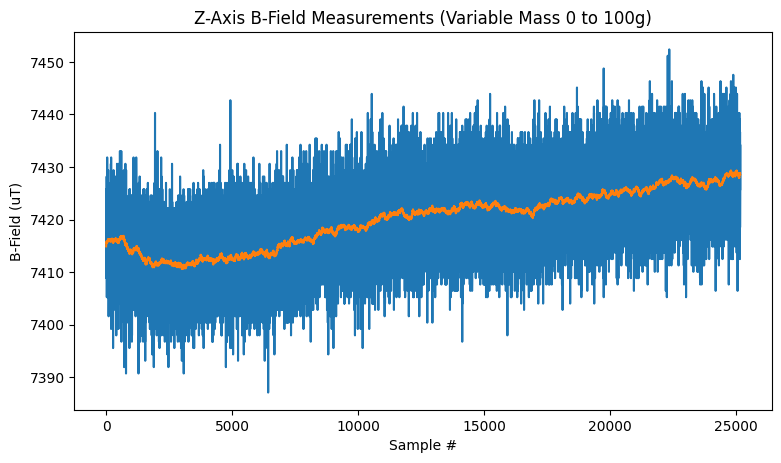

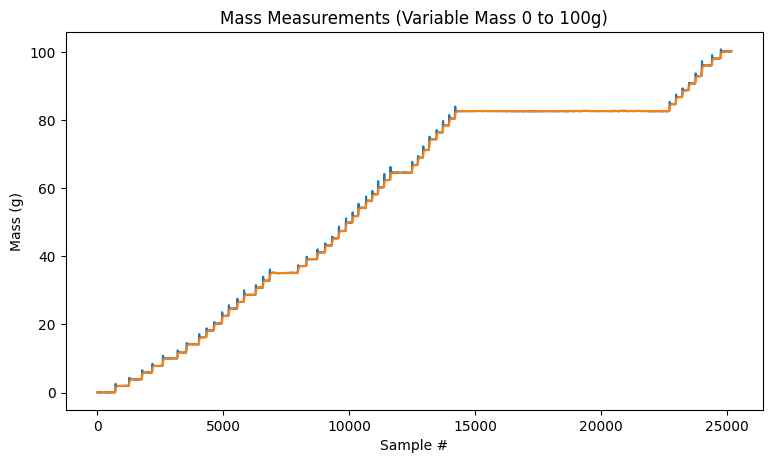

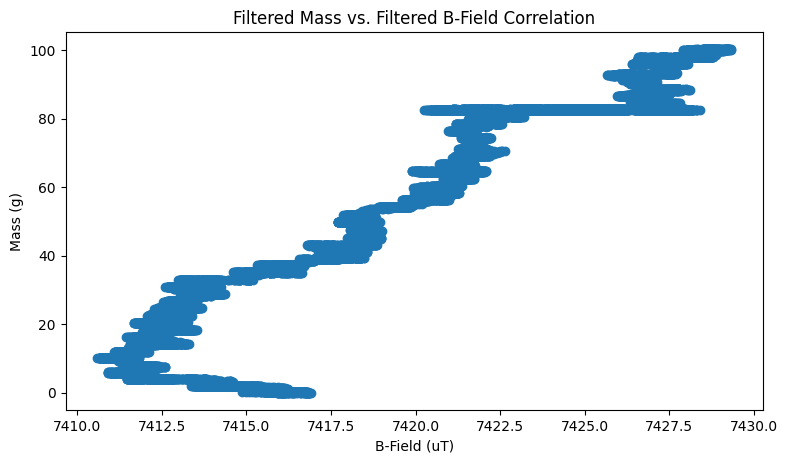

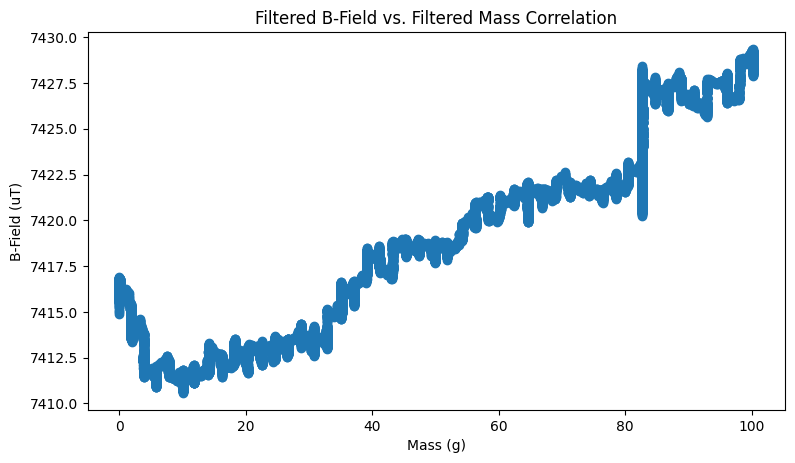

In [45]:
with open('auto_test6.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Variable Mass 0 to 100g)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Variable Mass 0 to 100g)")
plt.show()

plt.scatter(filtered_b_field_z, filtered_mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Filtered Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(filtered_mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Filtered Mass Correlation")
plt.show()

# Auto Logger Steady Test 2

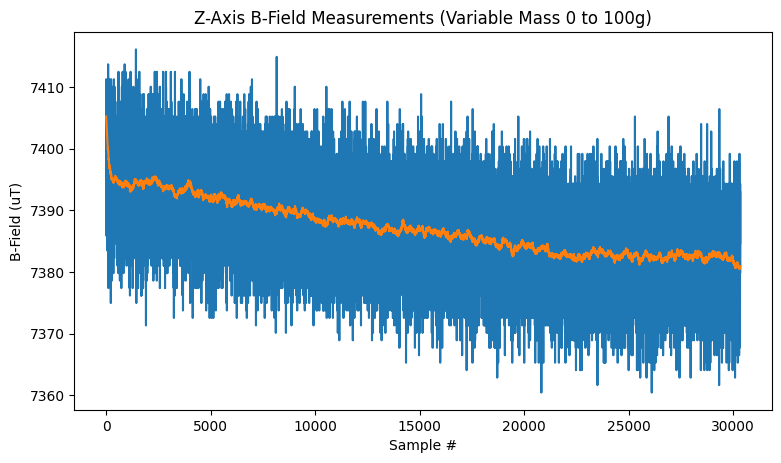

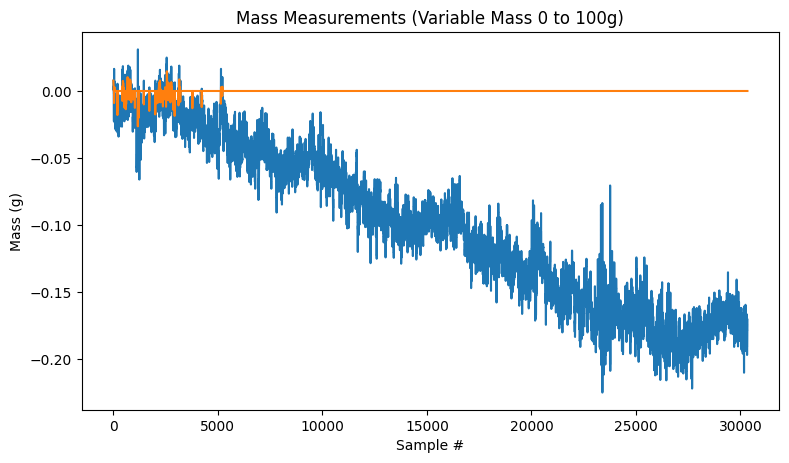

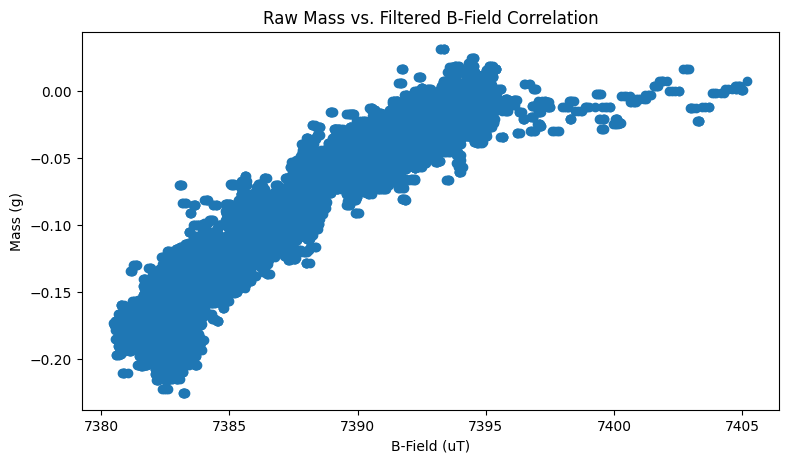

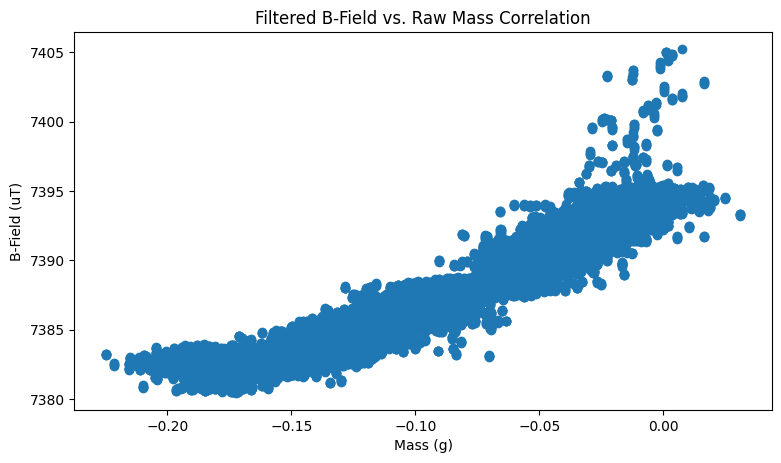

In [46]:
with open('auto_test_steady_2.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.1)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Variable Mass 0 to 100g)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Variable Mass 0 to 100g)")
plt.show()

plt.scatter(filtered_b_field_z, mass)
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.show()

plt.scatter(mass, filtered_b_field_z)
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.show()

# Auto Logger Steady Test 3

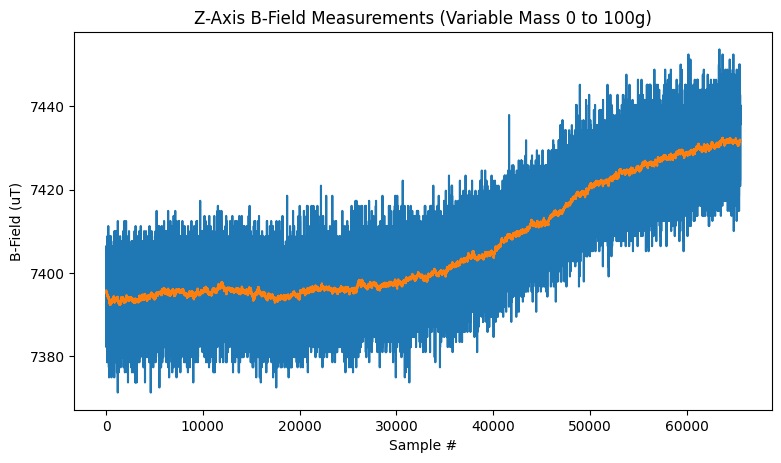

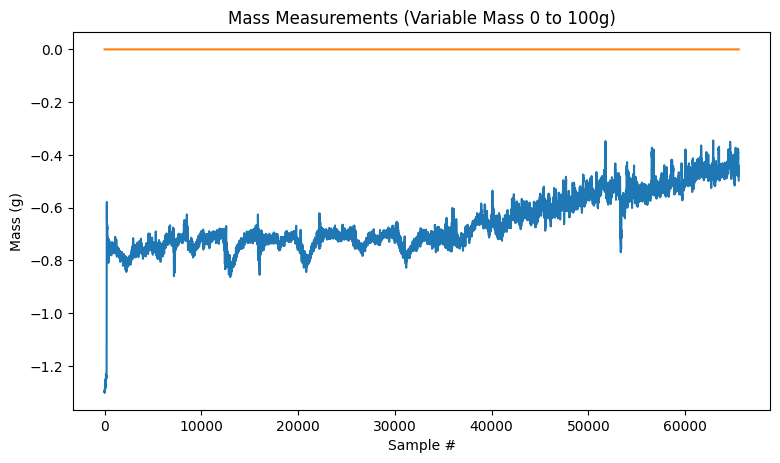

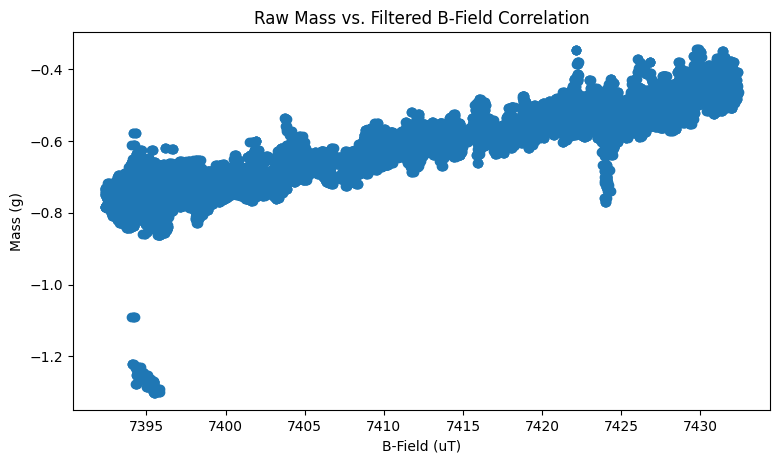

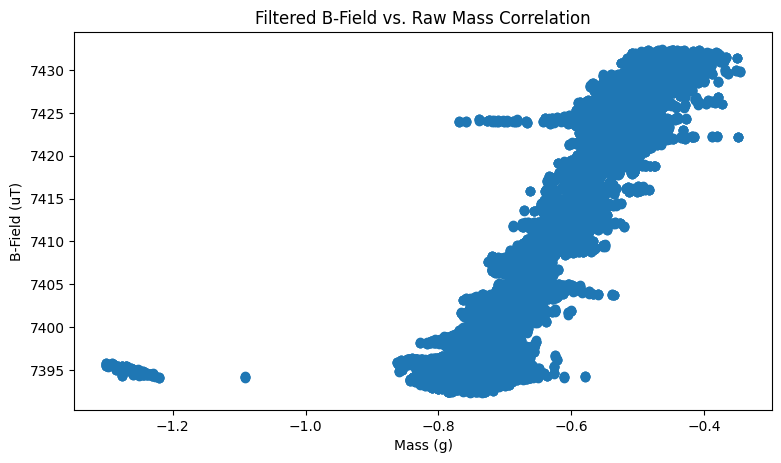

In [47]:
with open('auto_test_steady_3.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.04)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Variable Mass 0 to 100g)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Variable Mass 0 to 100g)")
plt.show()

plt.scatter(filtered_b_field_z, mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.show()

# Auto Logger Steady Test 4

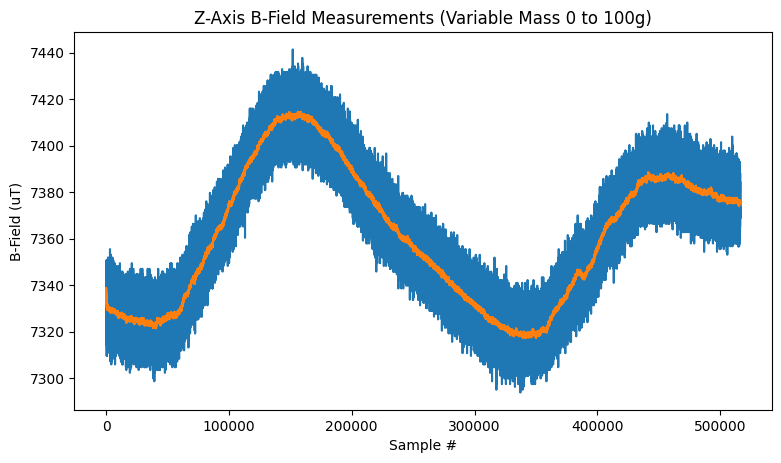

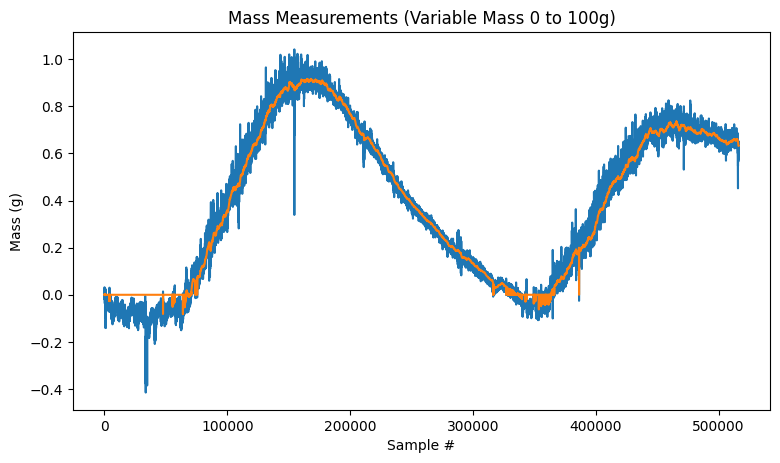

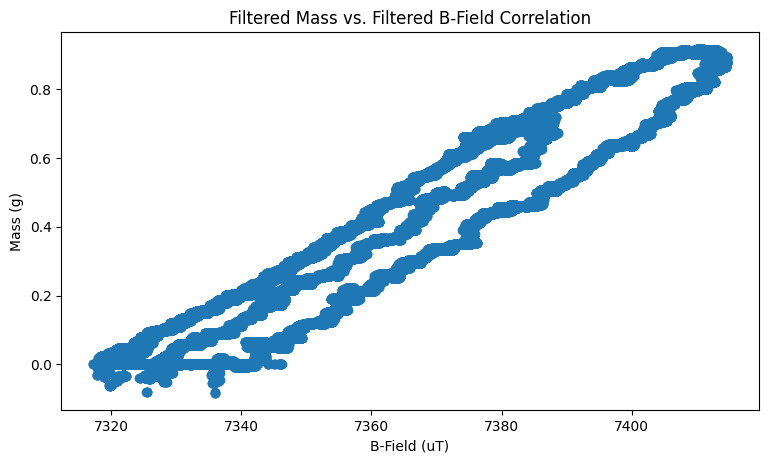

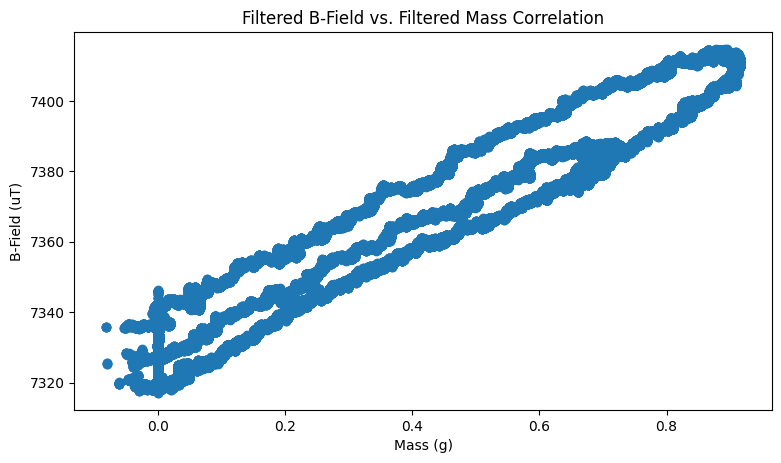

In [48]:
with open('auto_test_steady_4.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.001)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Variable Mass 0 to 100g)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Variable Mass 0 to 100g)")
plt.show()

plt.scatter(filtered_b_field_z, filtered_mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Filtered Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(filtered_mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Filtered Mass Correlation")
plt.show()

# Auto Logger Steady Test 5

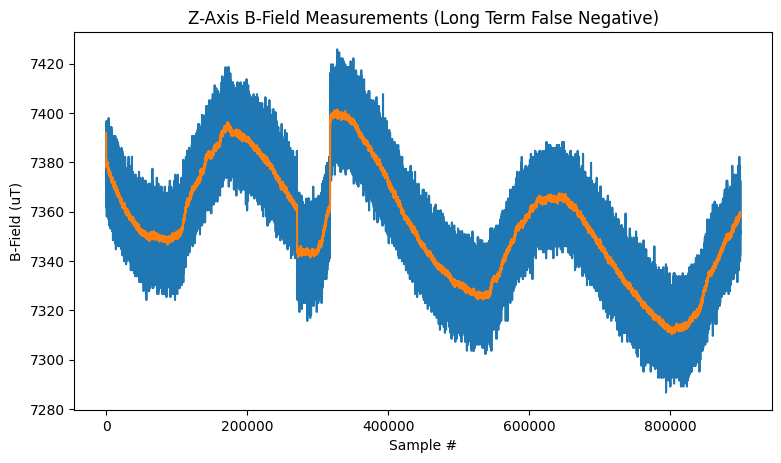

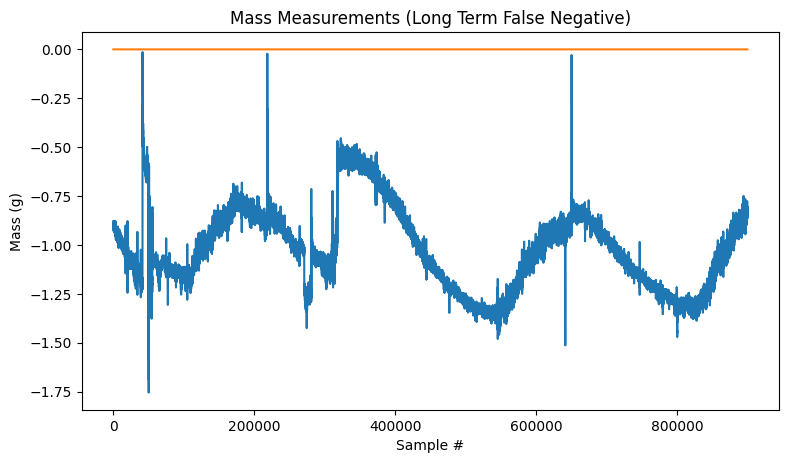

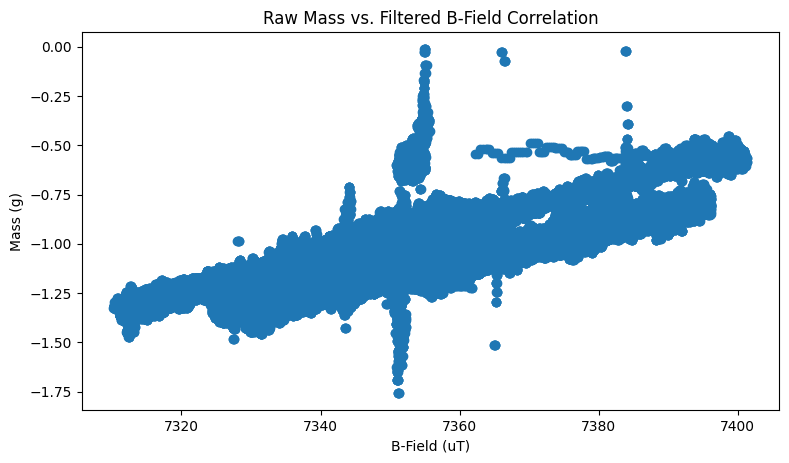

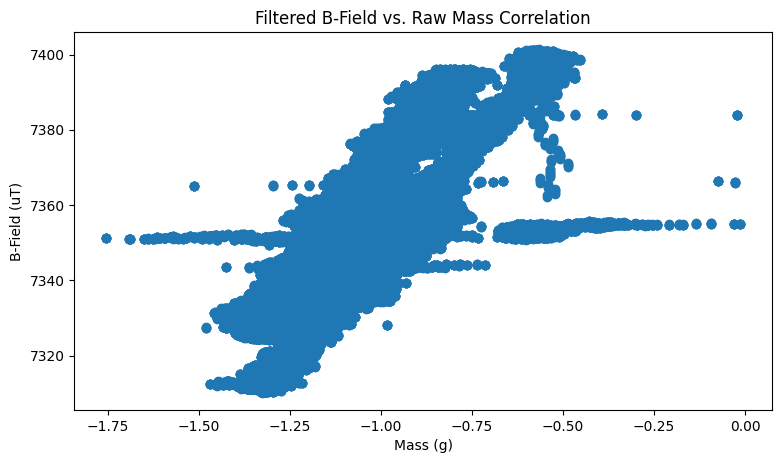

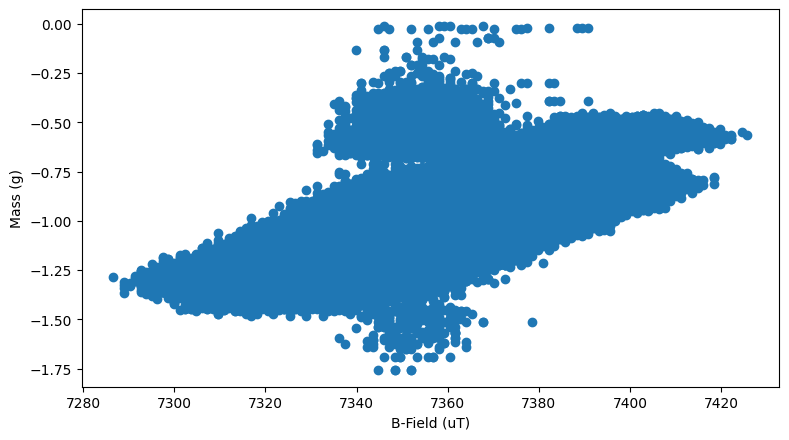

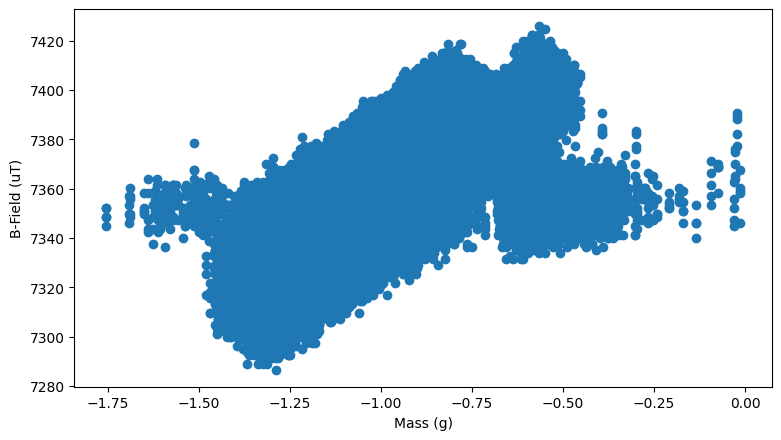

In [49]:
with open('auto_test_steady_5_edit.csv') as file:
    data = list(csv.reader(file))

data = data[100000:]

sample = [i for i in range(len(data))]
time = [i for i in range(len(data))]
b_field_x = [i for i in range(len(data))]
b_field_y = [i for i in range(len(data))]
b_field_z = [i for i in range(len(data))]
mass = [i for i in range(len(data))]


for i in range(len(data)):
    sample[i] = float(data[i][0])
    time[i] = float(data[i][1])
    b_field_x[i] = float(data[i][2])
    b_field_y[i] = float(data[i][3])
    b_field_z[i] = float(data[i][4])
    mass[i] = float(data[i][5])

hvt = b_field_z.index(max(b_field_z))

def delete_val(t):
    del b_field_z[t]
    del b_field_y[t]
    del b_field_x[t]
    del mass[t]
    del time[t]
    del sample[t]

delete_val(hvt)

indices_to_keep = [i for i, m in enumerate(mass) if m <= 0]

b_field_z = [b_field_z[i] for i in indices_to_keep]
b_field_y = [b_field_y[i] for i in indices_to_keep]
b_field_x = [b_field_x[i] for i in indices_to_keep]
mass = [mass[i] for i in indices_to_keep]
time = [time[i] for i in indices_to_keep]
sample = [sample[i] for i in indices_to_keep]


ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.3)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

sample = [i for i in range(len(b_field_z))]

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Measurements (Long Term False Negative)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Measurements (Long Term False Negative)")
plt.show()

plt.scatter(filtered_b_field_z, mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.show()

plt.scatter(b_field_z, mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.show()

plt.scatter(mass, b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.show()

ax.azim -65
ax.elev 30


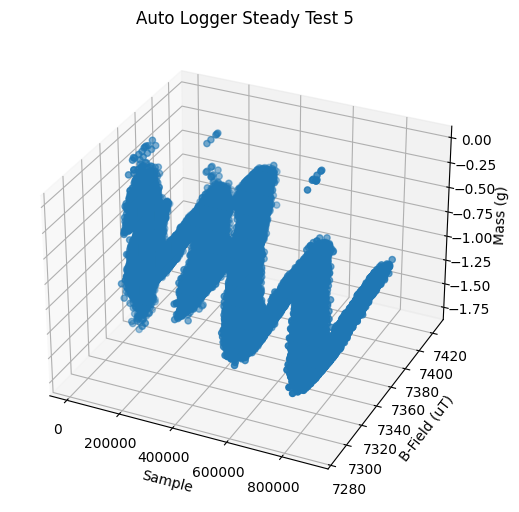

In [50]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.array(mass)
xline = np.array(sample)
yline = np.array(b_field_z)

ax.set_xlabel('Sample')
ax.set_ylabel('B-Field (uT)')
ax.set_zlabel('Mass (g)')

ax.scatter3D(xline, yline, zline)
ax.view_init(elev=30, azim=-65)
plt.tight_layout()
print('ax.azim {}'.format(ax.azim))
print('ax.elev {}'.format(ax.elev))

plt.title("Auto Logger Steady Test 5")
plt.show()

# Auto Logger Steady Test 6 (Temperature Compensation Enabled)

67440


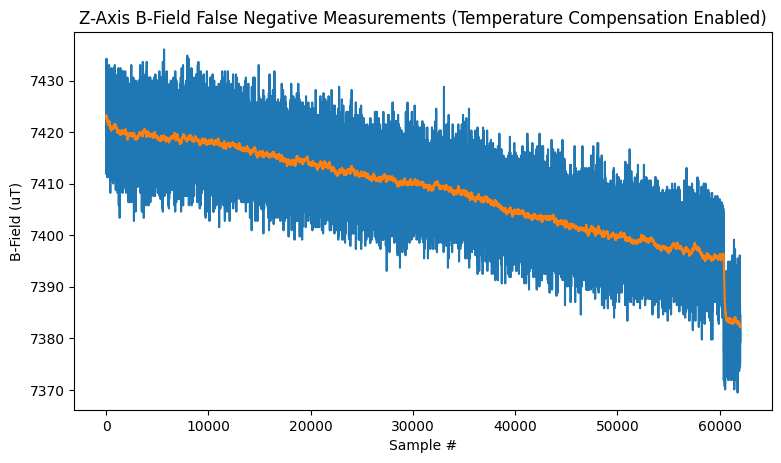

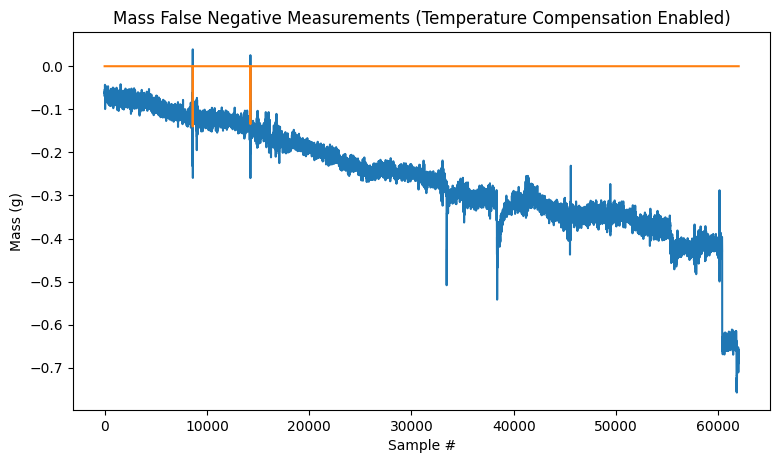

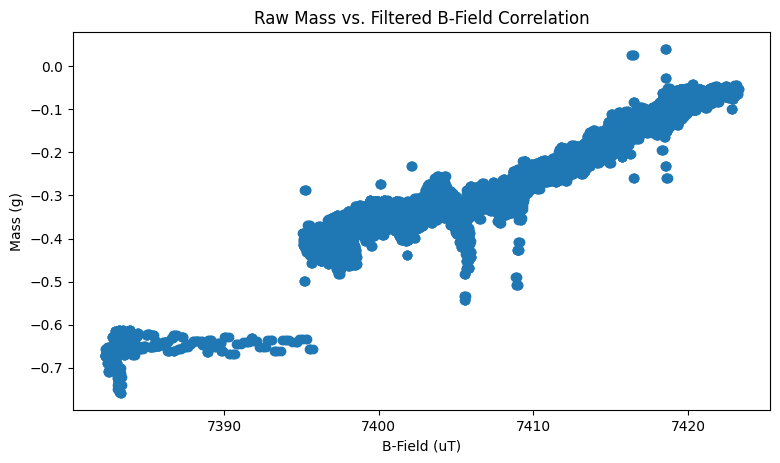

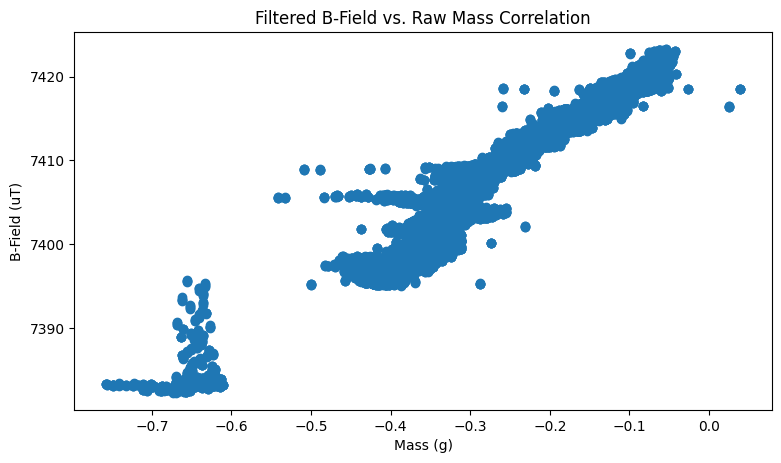

In [51]:
with open('auto_test_steady_6.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
print(len(data))

sample = [i for i in range(len(data))]
time = [i for i in range(len(data))]
b_field_x = [i for i in range(len(data))]
b_field_y = [i for i in range(len(data))]
b_field_z = [i for i in range(len(data))]
mass = [i for i in range(len(data))]


for i in range(len(data)):
    sample[i] = i
    time[i] = float(data[i][1])
    b_field_x[i] = float(data[i][2])
    b_field_y[i] = float(data[i][3])
    b_field_z[i] = float(data[i][4])
    mass[i] = float(data[i][5])

b_field_x = b_field_x[:62000]
b_field_y = b_field_y[:62000]
b_field_z = b_field_z[:62000]
mass = mass[:62000]
sample = sample[:62000]
time = time[:62000]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.1)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field False Negative Measurements (Temperature Compensation Enabled)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass False Negative Measurements (Temperature Compensation Enabled)")
plt.show()

plt.scatter(filtered_b_field_z, mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.show()

# Auto Logger Steady Test 7 (Z-series Hall Plate Readings Enabled and Temperature Compensation Enabled)

29030


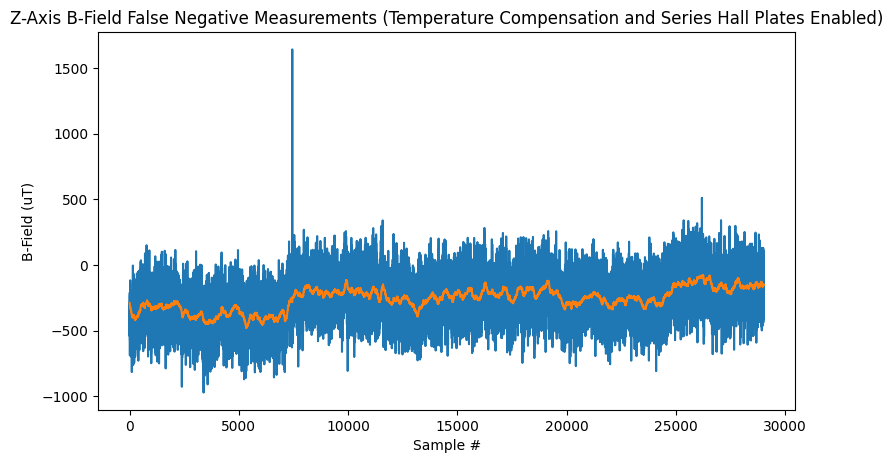

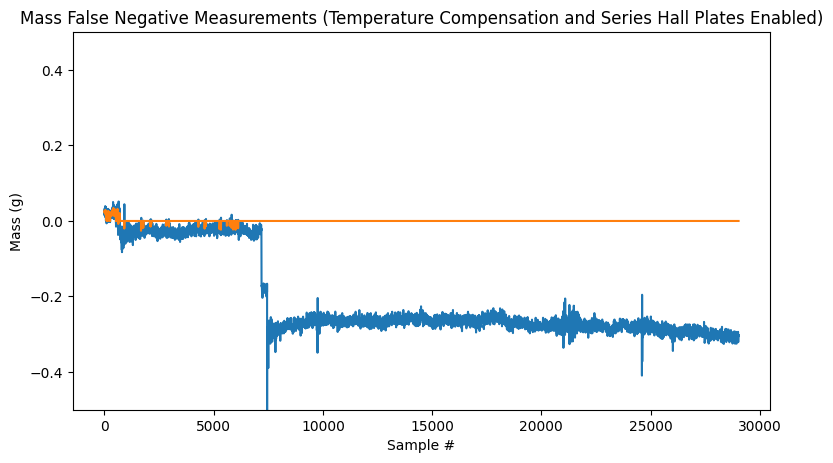

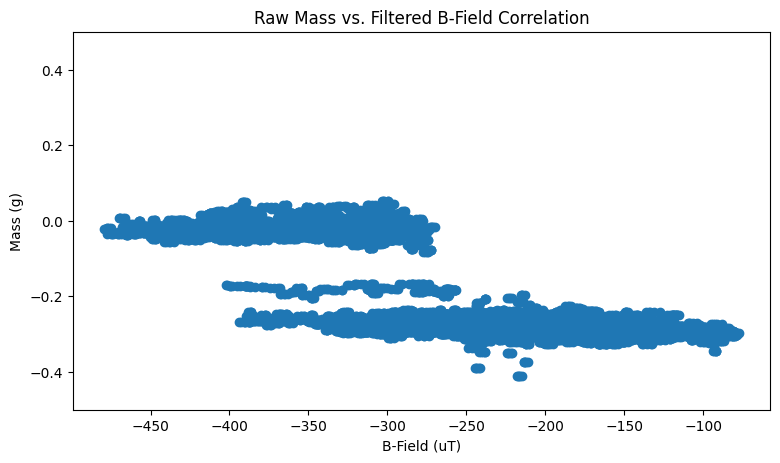

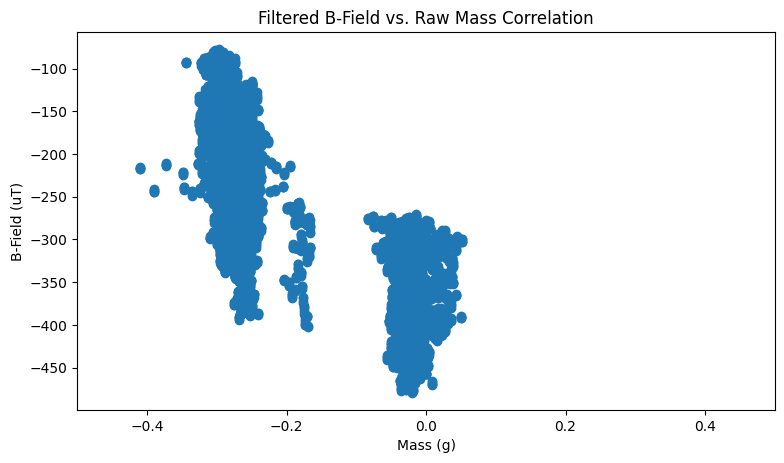

In [52]:
with open('auto_test_steady_7.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
print(len(data))

sample = [i for i in range(len(data))]
time = [i for i in range(len(data))]
b_field_x = [i for i in range(len(data))]
b_field_y = [i for i in range(len(data))]
b_field_z = [i for i in range(len(data))]
mass = [i for i in range(len(data))]


for i in range(len(data)):
    sample[i] = i
    time[i] = float(data[i][1])
    b_field_x[i] = float(data[i][2])
    b_field_y[i] = float(data[i][3])
    b_field_z[i] = float(data[i][4])
    mass[i] = float(data[i][5])

b_field_x = b_field_x[:62000]
b_field_y = b_field_y[:62000]
b_field_z = b_field_z[:62000]
mass = mass[:62000]
sample = sample[:62000]
time = time[:62000]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.1)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field False Negative Measurements (Temperature Compensation and Series Hall Plates Enabled)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.ylim([-0.5, 0.5])
plt.title("Mass False Negative Measurements (Temperature Compensation and Series Hall Plates Enabled)")
plt.show()

plt.scatter(filtered_b_field_z, mass)
plt.xlabel("B-Field (uT)")
plt.ylim([-0.5, 0.5])
plt.ylabel("Mass (g)")
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.xlim([-0.5, 0.5])
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.show()

# Auto Logger No Magnet Test 1

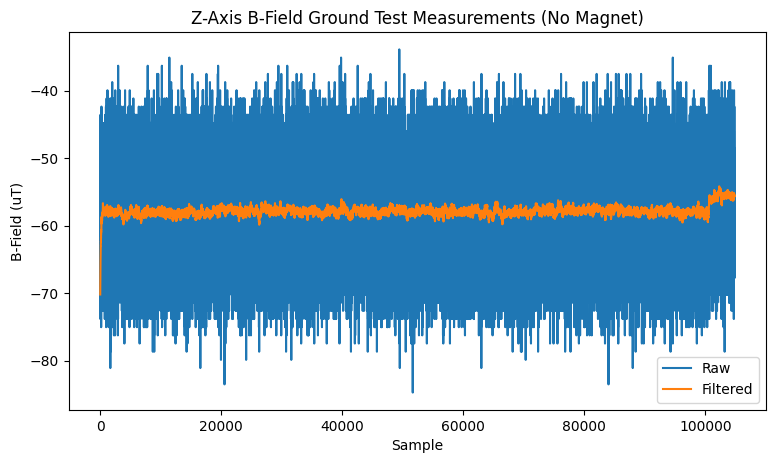

In [53]:
with open('auto_test_steady_no_mag_1.csv') as file:
    data = list(csv.reader(file))

data = data[10000:]

b_field_z = [float(i[0]) for i in data]
ema_filter_mag = EMAFilter(alpha=0.01)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])

sample = [i for i in range(len(b_field_z))]

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.legend()
plt.title("Z-Axis B-Field Ground Test Measurements (No Magnet)")
plt.xlabel("Sample")
plt.ylabel("B-Field (uT)")
plt.show()

# Auto Logger No Magnet Test 2

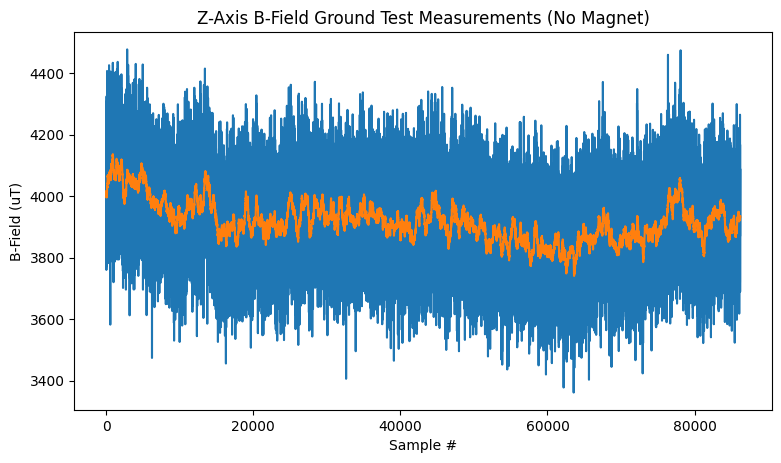

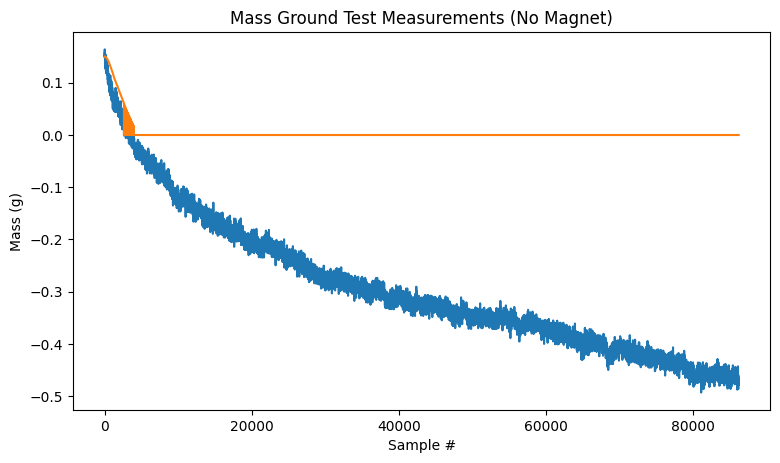

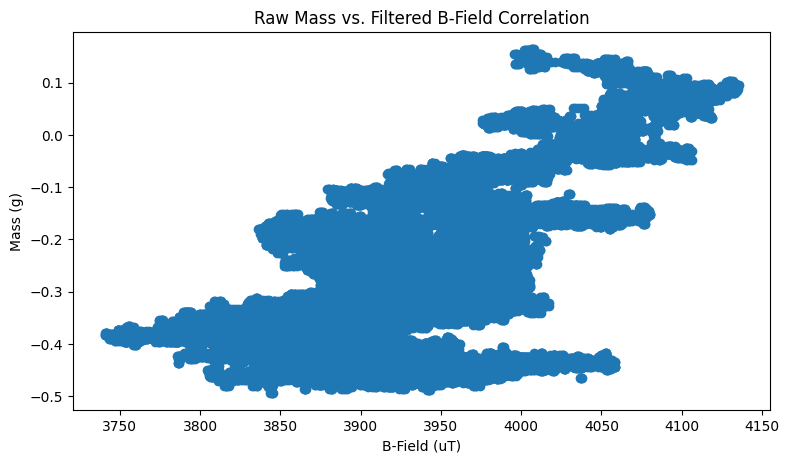

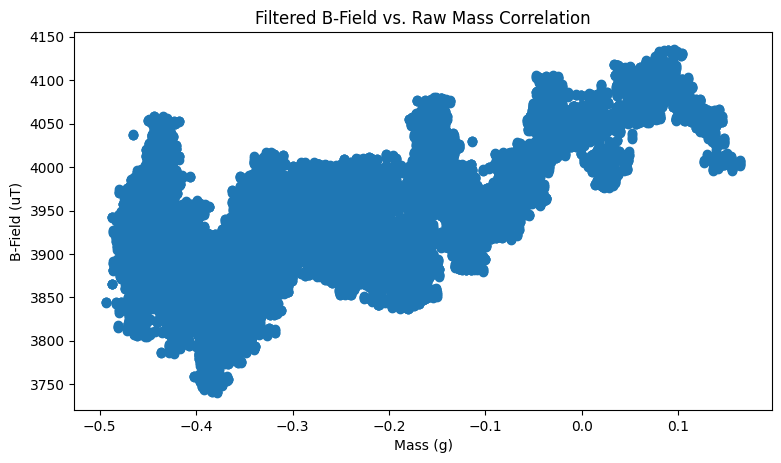

In [54]:
with open('auto_test_steady_no_mag_2.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.001)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Ground Test Measurements (No Magnet)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Ground Test Measurements (No Magnet)")
plt.show()

plt.scatter(filtered_b_field_z, mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.show()

# Auto Logger No Magnet Test 3

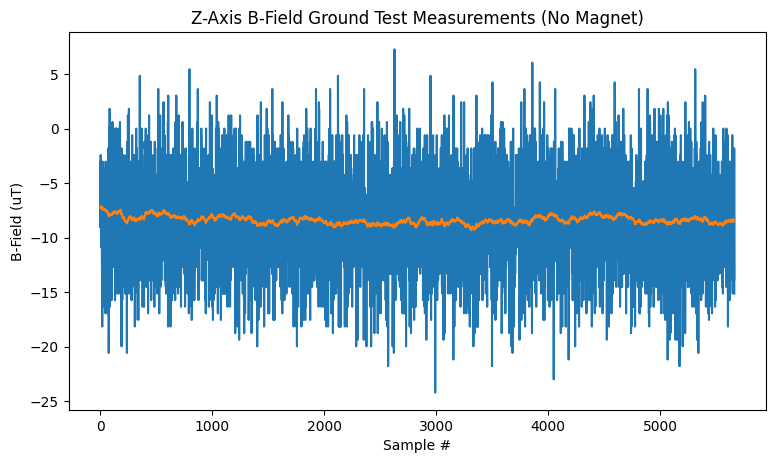

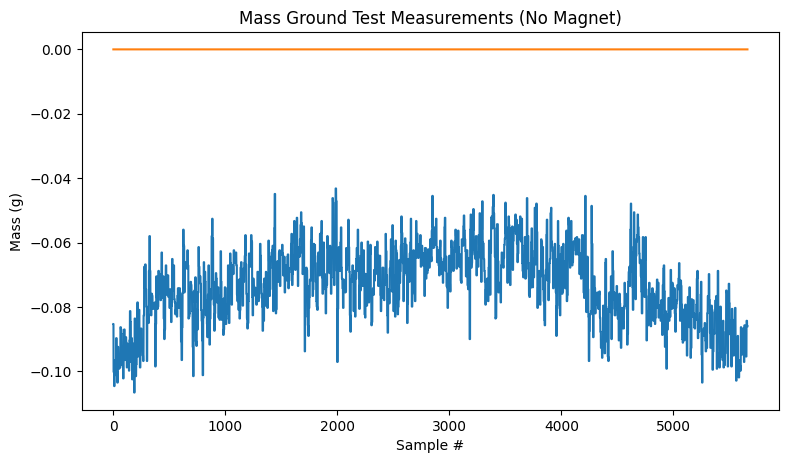

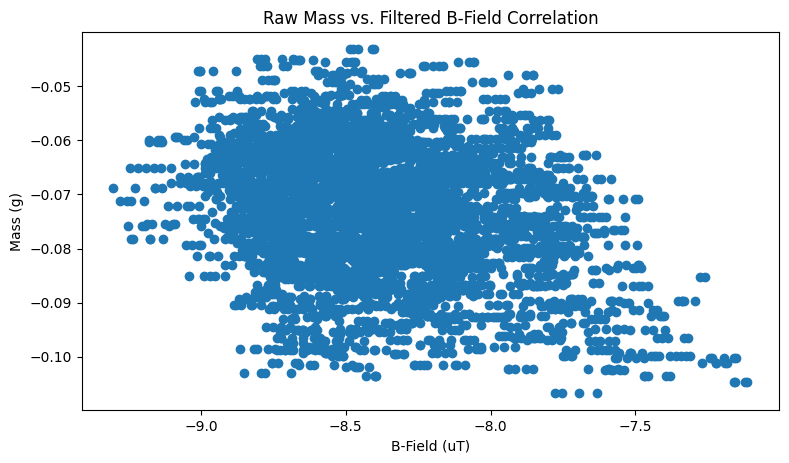

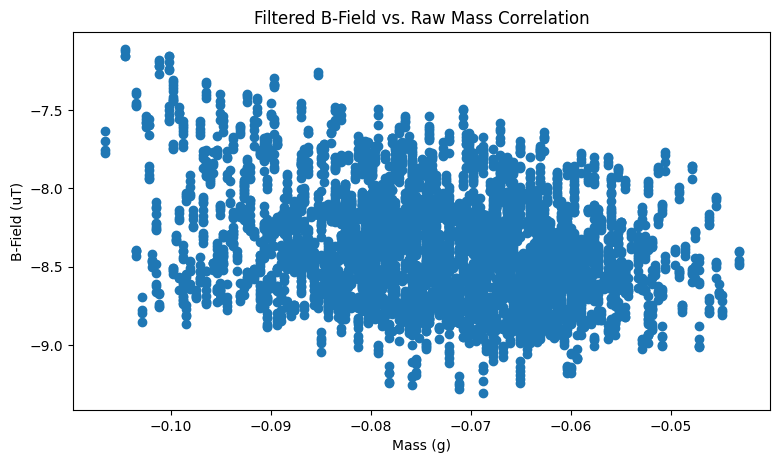

In [55]:
with open('auto_test_steady_no_mag_3.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [float(i[0]) for i in data]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.001)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Ground Test Measurements (No Magnet)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Ground Test Measurements (No Magnet)")
plt.show()

plt.scatter(filtered_b_field_z, mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.show()

# Auto Logger No Magnet Test 4

In [56]:
with open('magnetlogger_test_steady_no_mag.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [i for i in range(len(data))]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.0001)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Long Term Ground Test Measurements (No Magnet)")
plt.show()
plt.plot(sample, mass, label="Raw")
# plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Long Term Ground Test Measurements (No Magnet)")
plt.show()

plt.scatter(filtered_b_field_z, filtered_mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(filtered_mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'magnetlogger_test_steady_no_mag.csv'

# Long Tube Test 1 (Live Demo Last Day)

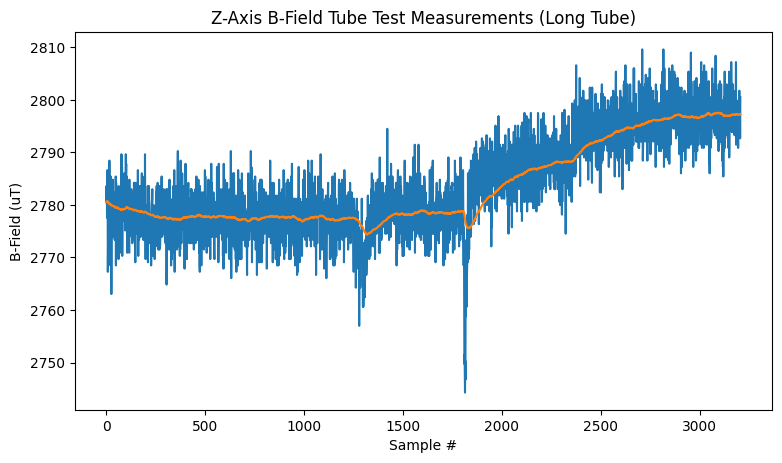

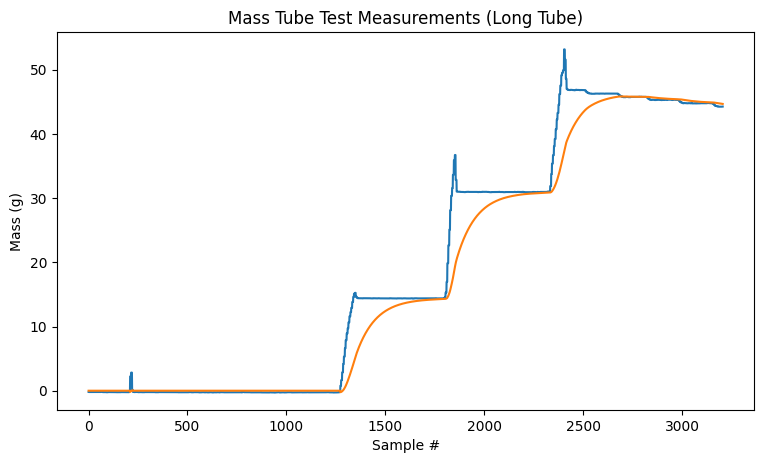

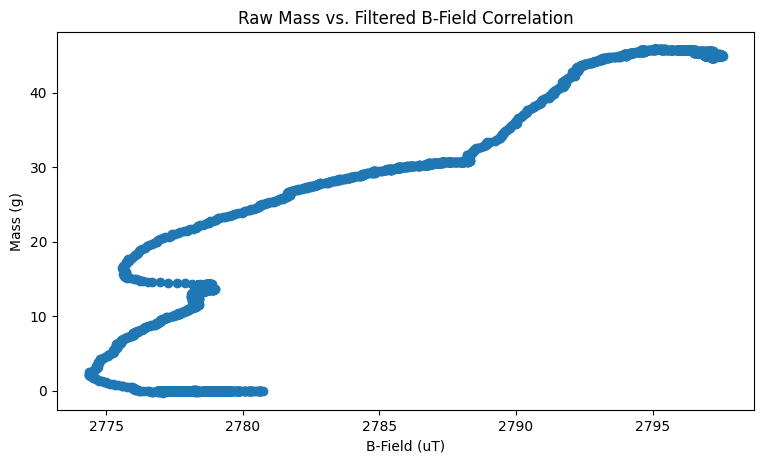

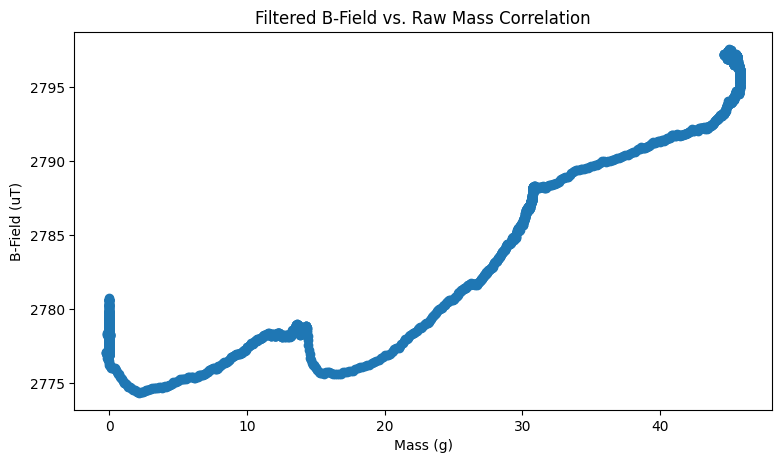

In [ ]:
with open('auto_test_steady_no_mag_testjjk.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [i for i in range(len(data))]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5])*-1 + 25 for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.01)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Tube Test Measurements (Long Tube)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Tube Test Measurements (Long Tube)")
plt.show()

plt.scatter(filtered_b_field_z, filtered_mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(filtered_mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.show()

# Long Tube Soft Test 1

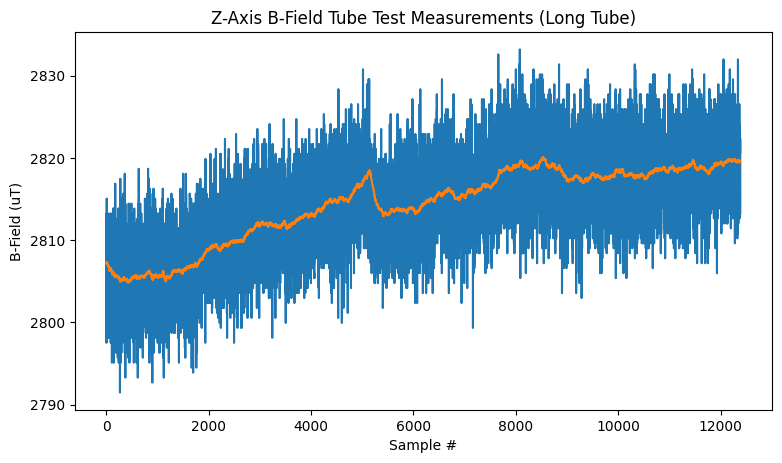

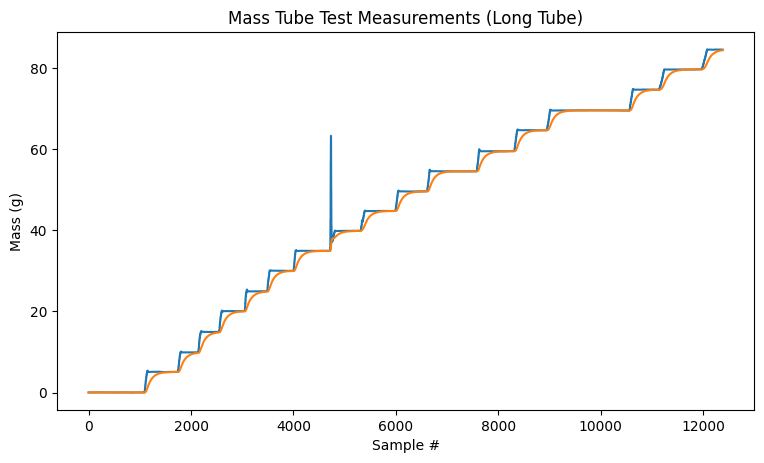

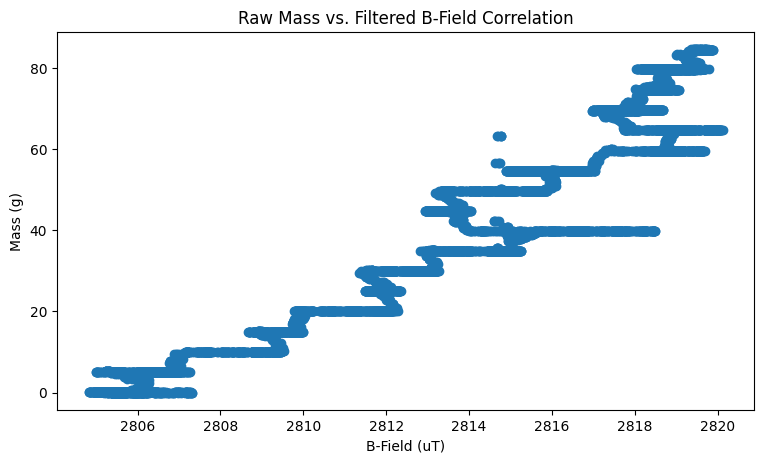

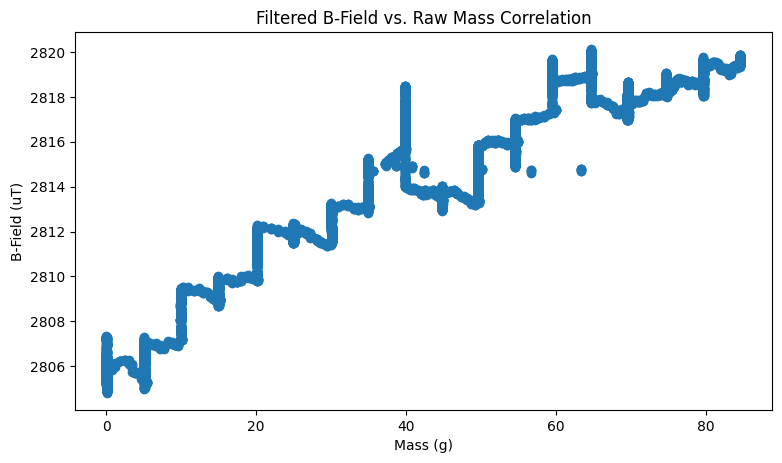

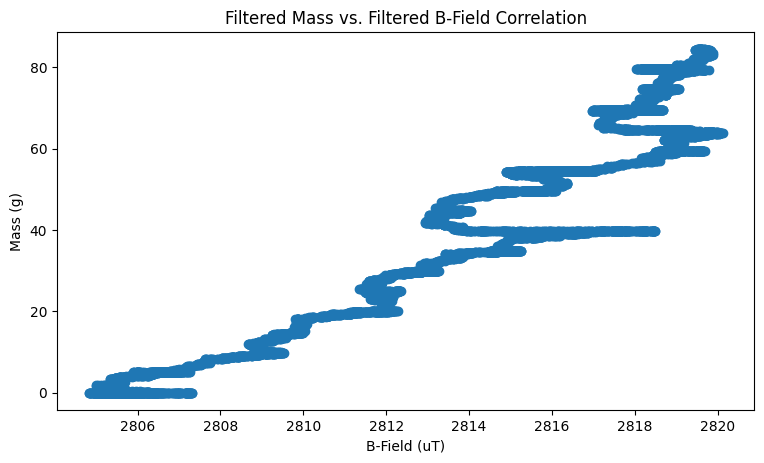

Regression Accuracy: 91.3%
r^2: 0.9129197268380946


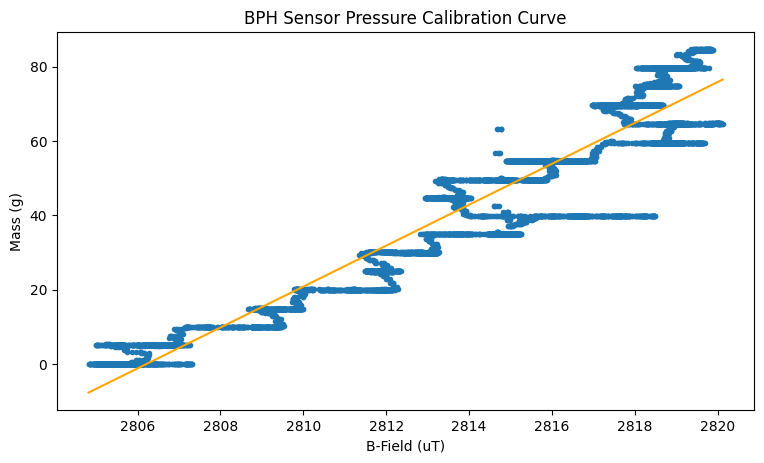

Equation: mass = 5.497464435048792*pressure + -15426.987524853394
Regression Accuracy: 91.4%
r^2: 0.9140969543139819


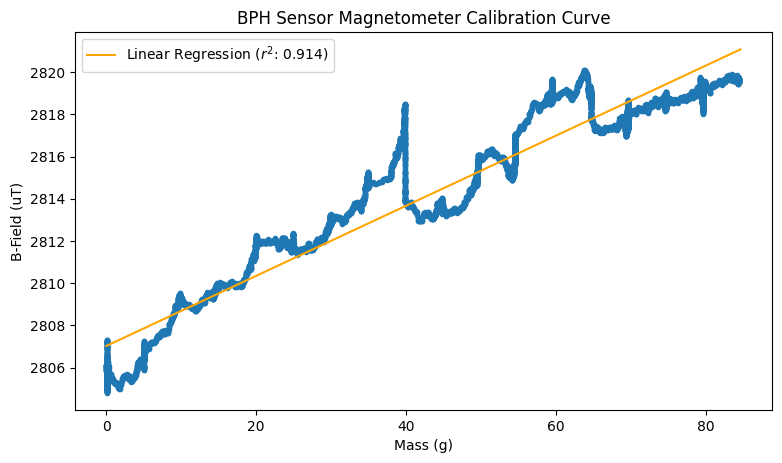

Equation: mass = 0.16604718012608133*pressure + 2807.0291834988934


In [75]:
import csv

with open('soft_test1.csv') as file:
    data = list(csv.reader(file))

data = data[1:]
sample = [i for i in range(len(data))]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]

ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.01)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])
ema_filter_mass = EMAFilter(alpha=0.1)
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in filtered_mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Tube Test Measurements (Long Tube)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Tube Test Measurements (Long Tube)")
plt.show()

plt.scatter(filtered_b_field_z, mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Raw Mass vs. Filtered B-Field Correlation")
plt.show()

plt.scatter(mass, filtered_b_field_z)
plt.ylabel("B-Field (uT)")
plt.xlabel("Mass (g)")
plt.title("Filtered B-Field vs. Raw Mass Correlation")
plt.show()

plt.scatter(filtered_b_field_z, filtered_mass)
plt.xlabel("B-Field (uT)")
plt.ylabel("Mass (g)")
plt.title("Filtered Mass vs. Filtered B-Field Correlation")
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_b_field_z, mass)
accuracy = r_value**2 * 100
print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
plt.scatter(filtered_b_field_z, mass, marker=".")
x = np.linspace(filtered_b_field_z.min(), filtered_b_field_z.max(),10000)
plt.plot(x,slope*x + intercept, color="orange")
plt.ylabel("Mass (g)")
plt.xlabel("B-Field (uT)")
plt.title("BPH Sensor Pressure Calibration Curve")
plt.show()
print(f'Equation: mass = {slope}*pressure + {intercept}')

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_mass, filtered_b_field_z)
accuracy = r_value**2 * 100
print(f'Regression Accuracy: {accuracy:0.1f}%\nr^2: {r_value**2}')
plt.scatter(filtered_mass, filtered_b_field_z, marker=".")
x = np.linspace(np.array(mass).min(), np.array(mass).max(),10000)
plt.plot(x,slope*x + intercept, color="orange",label=f"Linear Regression ($r^2$: {accuracy/100:0.3f})")
plt.xlabel("Mass (g)")
plt.ylabel("B-Field (uT)")
plt.title("BPH Sensor Magnetometer Calibration Curve")
plt.legend()
plt.show()
print(f'Equation: mass = {slope}*pressure + {intercept}')

# Long Tube No Load (False Negative Test) 1

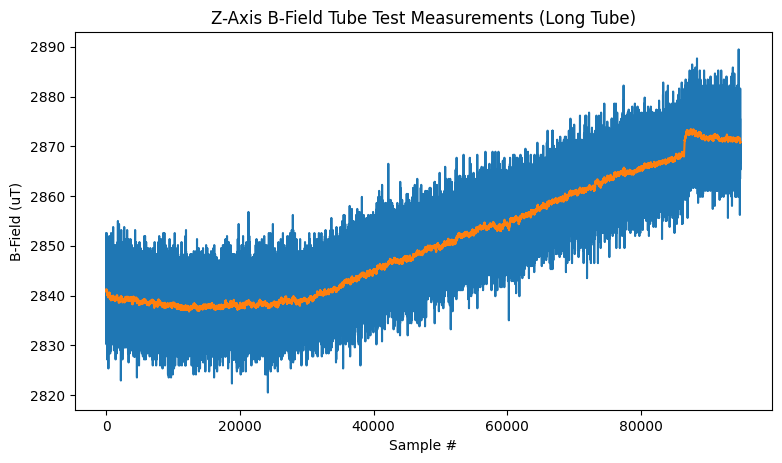

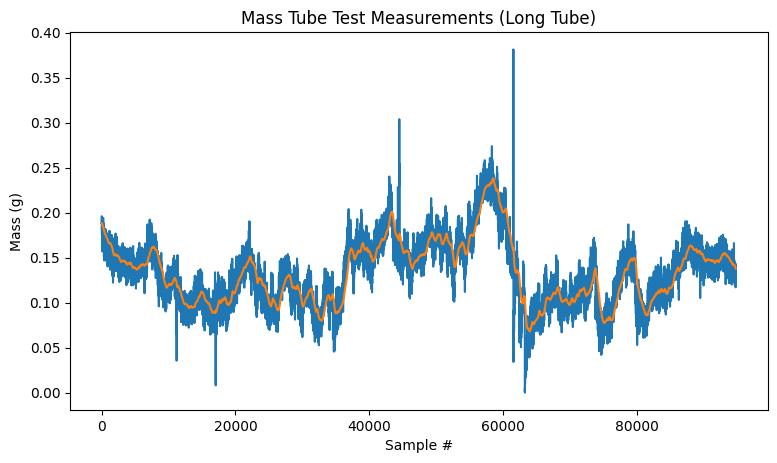

In [248]:
import csv

with open('soft_no_load_test1.csv') as file:
    data = list(csv.reader(file))

data = data[1:]

sample = [i for i in range(len(data))]
time = [float(i[1]) for i in data]
b_field_x = [float(i[2]) for i in data]
b_field_y = [float(i[3]) for i in data]
b_field_z = [float(i[4]) for i in data]
mass = [float(i[5]) for i in data]
num = min(mass)
mass = [abs(i+abs(num)) for i in mass]


ema_filter_mag = EMAFilter(alpha=0.01)
ema_filter_mass = EMAFilter(alpha=0.002)
filtered_b_field_z = np.array([ema_filter_mag.update(value) for value in b_field_z])
filtered_b_field_y = np.array([ema_filter_mag.update(value) for value in b_field_y])
filtered_b_field_x = np.array([ema_filter_mag.update(value) for value in b_field_x])
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in mass])
ema_filter_mass = EMAFilter(alpha=0.1)
filtered_mass = np.array([ema_filter_mass.update(value)*(value >= 0) for value in filtered_mass])

plt.plot(sample, b_field_z, label="Raw")
plt.plot(sample, filtered_b_field_z, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("B-Field (uT)")
plt.title("Z-Axis B-Field Tube Test Measurements (Long Tube)")
plt.show()
plt.plot(sample, mass, label="Raw")
plt.plot(sample, filtered_mass, label="Filtered")
plt.xlabel("Sample #")
plt.ylabel("Mass (g)")
plt.title("Mass Tube Test Measurements (Long Tube)")
plt.show()